## Data Visulization/Pre-Processing


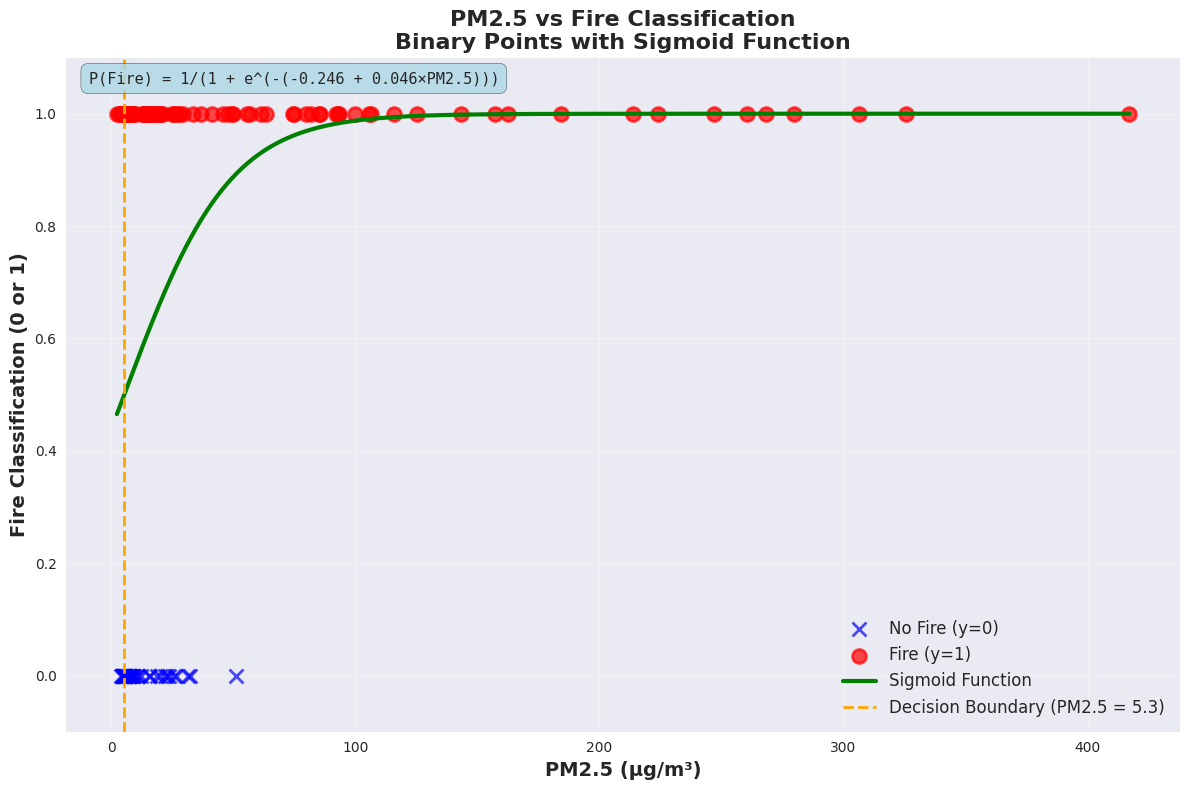

PM2.5 BINARY CLASSIFICATION WITH SIGMOID
Sigmoid Equation: P(Fire) = 1/(1 + e^(-(-0.246 + 0.046×PM2.5)))
Decision Boundary: PM2.5 = 5.3 µg/m³
Below 5.3: Predict No Fire (0)
Above 5.3: Predict Fire (1)
Total samples: 123
No Fire days: 37
Fire days: 86


In [45]:
# ===== PM2.5 vs BINARY CLASSIFICATION WITH SIGMOID FUNCTION =====
# Clean plot showing PM2.5 on x-axis, binary points (0 or 1), and sigmoid curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Prepare data
X = df[['PM25']].values
y = df['yn'].values

# Fit logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X, y)

# Get model parameters
intercept = lr_model.intercept_[0]
coefficient = lr_model.coef_[0][0]

# Create PM2.5 range for sigmoid curve
pm25_range = np.linspace(df['PM25'].min(), df['PM25'].max(), 1000)
sigmoid_values = expit(intercept + coefficient * pm25_range)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot binary data points (0 or 1 only)
plt.scatter(df[df['yn'] == 0]['PM25'], df[df['yn'] == 0]['yn'], 
           c='blue', s=100, alpha=0.7, label='No Fire (y=0)', marker='x', linewidth=2)
plt.scatter(df[df['yn'] == 1]['PM25'], df[df['yn'] == 1]['yn'], 
           c='red', s=100, alpha=0.7, label='Fire (y=1)', marker='o', linewidth=2)

# Plot sigmoid function
plt.plot(pm25_range, sigmoid_values, 'g-', linewidth=3, label='Sigmoid Function')

# Add decision boundary at 0.5 probability
decision_boundary = -intercept / coefficient
plt.axvline(x=decision_boundary, color='orange', linestyle='--', linewidth=2, 
           label=f'Decision Boundary (PM2.5 = {decision_boundary:.1f})')

# Customize plot
plt.xlabel('PM2.5 (µg/m³)', fontsize=14, fontweight='bold')
plt.ylabel('Fire Classification (0 or 1)', fontsize=14, fontweight='bold')
plt.title('PM2.5 vs Fire Classification\nBinary Points with Sigmoid Function', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# Add equation text
equation_text = f'P(Fire) = 1/(1 + e^(-({intercept:.3f} + {coefficient:.3f}×PM2.5)))'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary
print("="*60)
print("PM2.5 BINARY CLASSIFICATION WITH SIGMOID")
print("="*60)
print(f"Sigmoid Equation: {equation_text}")
print(f"Decision Boundary: PM2.5 = {decision_boundary:.1f} µg/m³")
print(f"Below {decision_boundary:.1f}: Predict No Fire (0)")
print(f"Above {decision_boundary:.1f}: Predict Fire (1)")
print(f"Total samples: {len(df)}")
print(f"No Fire days: {len(df[df['yn'] == 0])}")
print(f"Fire days: {len(df[df['yn'] == 1])}")


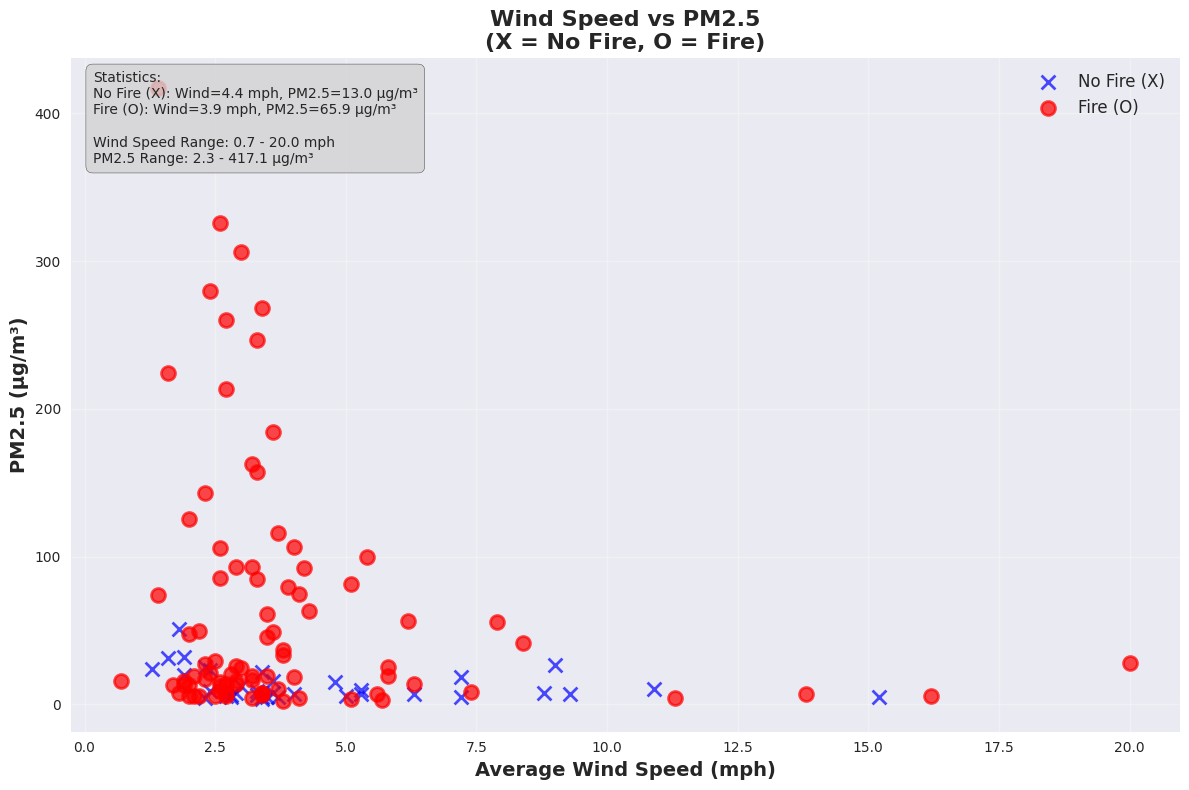

WIND SPEED vs PM2.5 ANALYSIS
No Fire days: 37 (Blue X markers)
Fire days: 86 (Red O markers)
Wind speed difference: 0.5 mph
PM2.5 difference: 52.9 µg/m³
Wind Speed vs PM2.5 correlation: -0.186
Wind Speed vs Fire correlation: -0.083


In [46]:
# ===== WIND SPEED vs PM2.5 SCATTER PLOT =====
# Scatter plot with wind speed on x-axis, PM2.5 on y-axis, and different markers for fire/no fire

plt.figure(figsize=(12, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['Avg_Wind_Speed'], no_fire_data['PM25'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
plt.scatter(fire_data['Avg_Wind_Speed'], fire_data['PM25'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

# Customize the plot
plt.xlabel('Average Wind Speed (mph)', fontsize=14, fontweight='bold')
plt.ylabel('PM2.5 (µg/m³)', fontsize=14, fontweight='bold')
plt.title('Wind Speed vs PM2.5\n(X = No Fire, O = Fire)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics
no_fire_wind_mean = no_fire_data['Avg_Wind_Speed'].mean()
fire_wind_mean = fire_data['Avg_Wind_Speed'].mean()
no_fire_pm25_mean = no_fire_data['PM25'].mean()
fire_pm25_mean = fire_data['PM25'].mean()

# Add text box with statistics
stats_text = f"""Statistics:
No Fire (X): Wind={no_fire_wind_mean:.1f} mph, PM2.5={no_fire_pm25_mean:.1f} µg/m³
Fire (O): Wind={fire_wind_mean:.1f} mph, PM2.5={fire_pm25_mean:.1f} µg/m³

Wind Speed Range: {df['Avg_Wind_Speed'].min():.1f} - {df['Avg_Wind_Speed'].max():.1f} mph
PM2.5 Range: {df['PM25'].min():.1f} - {df['PM25'].max():.1f} µg/m³"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*60)
print("WIND SPEED vs PM2.5 ANALYSIS")
print("="*60)
print(f"No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"Fire days: {len(fire_data)} (Red O markers)")
print(f"Wind speed difference: {abs(fire_wind_mean - no_fire_wind_mean):.1f} mph")
print(f"PM2.5 difference: {abs(fire_pm25_mean - no_fire_pm25_mean):.1f} µg/m³")

# Calculate correlation
wind_pm25_corr = df['Avg_Wind_Speed'].corr(df['PM25'])
wind_fire_corr = df['Avg_Wind_Speed'].corr(df['yn'])
print(f"Wind Speed vs PM2.5 correlation: {wind_pm25_corr:.3f}")
print(f"Wind Speed vs Fire correlation: {wind_fire_corr:.3f}")


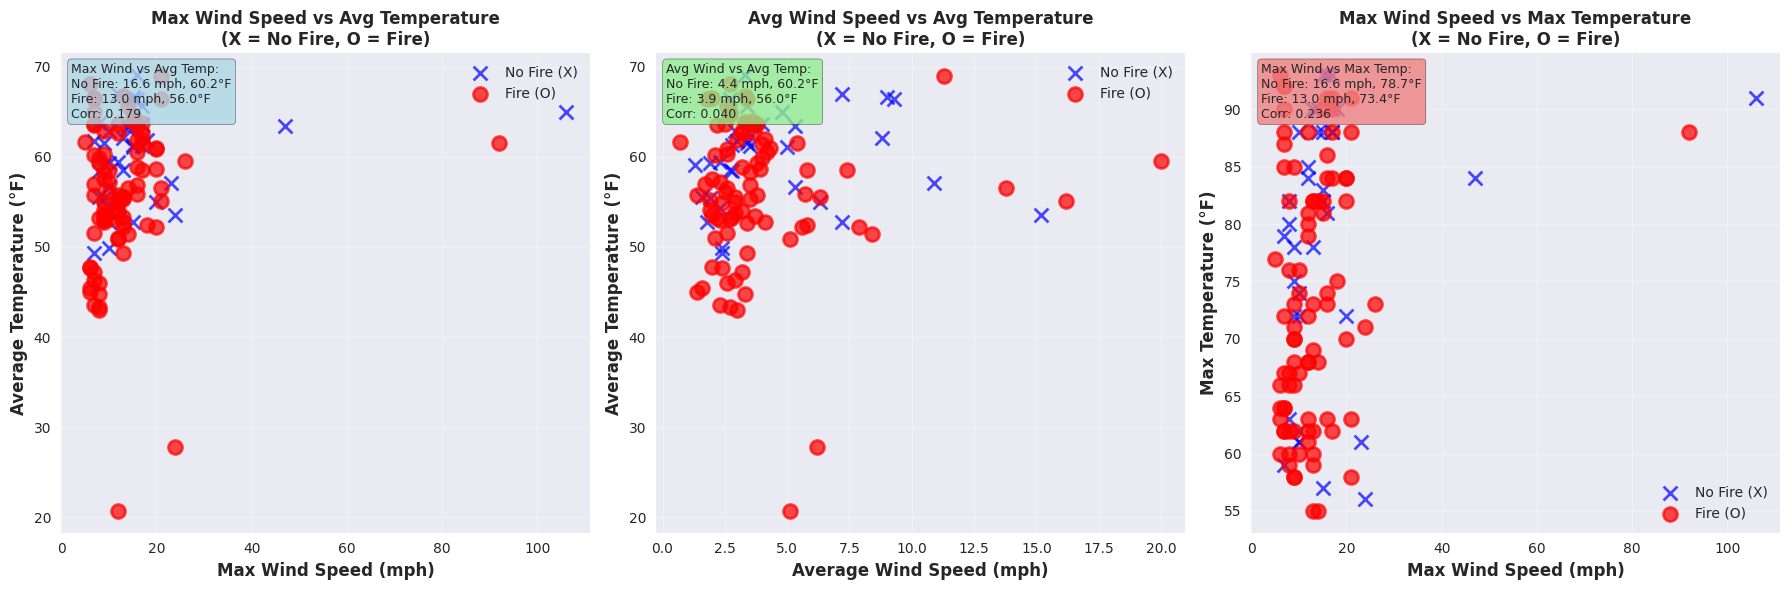

WIND SPEED vs TEMPERATURE ANALYSIS

1. Max Wind Speed vs Average Temperature:
   No Fire: Max Wind = 16.6 mph, Avg Temp = 60.2°F
   Fire: Max Wind = 13.0 mph, Avg Temp = 56.0°F
   Wind difference: 3.6 mph
   Temp difference: 4.2°F
   Correlation: 0.179

2. Average Wind Speed vs Average Temperature:
   No Fire: Avg Wind = 4.4 mph, Avg Temp = 60.2°F
   Fire: Avg Wind = 3.9 mph, Avg Temp = 56.0°F
   Wind difference: 0.5 mph
   Temp difference: 4.2°F
   Correlation: 0.040

3. Max Wind Speed vs Max Temperature:
   No Fire: Max Wind = 16.6 mph, Max Temp = 78.7°F
   Fire: Max Wind = 13.0 mph, Max Temp = 73.4°F
   Wind difference: 3.6 mph
   Temp difference: 5.3°F
   Correlation: 0.236

4. Key Insights:
   - Max wind speed shows larger difference between fire/no-fire
   - Max temperature shows larger difference between fire/no-fire
   - Wind-Temp correlations: Max-Max: 0.236, Avg-Avg: 0.040, Max-Avg: 0.179


In [47]:
# ===== WIND SPEED vs TEMPERATURE SCATTER PLOTS =====
# Three scatter plots showing wind speed vs temperature relationships with fire/no fire markers

# Create subplots for the three combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: Max Wind Speed vs Avg Temperature
ax1 = axes[0]
ax1.scatter(no_fire_data['Max_Wind_Speed'], no_fire_data['Avg_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['Max_Wind_Speed'], fire_data['Avg_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('Max Wind Speed (mph)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
ax1.set_title('Max Wind Speed vs Avg Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_max_wind = no_fire_data['Max_Wind_Speed'].mean()
fire_max_wind = fire_data['Max_Wind_Speed'].mean()
no_fire_avg_temp = no_fire_data['Avg_Temp'].mean()
fire_avg_temp = fire_data['Avg_Temp'].mean()

stats_text1 = f"""Max Wind vs Avg Temp:
No Fire: {no_fire_max_wind:.1f} mph, {no_fire_avg_temp:.1f}°F
Fire: {fire_max_wind:.1f} mph, {fire_avg_temp:.1f}°F
Corr: {df['Max_Wind_Speed'].corr(df['Avg_Temp']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: Avg Wind Speed vs Avg Temperature
ax2 = axes[1]
ax2.scatter(no_fire_data['Avg_Wind_Speed'], no_fire_data['Avg_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['Avg_Wind_Speed'], fire_data['Avg_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('Average Wind Speed (mph)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
ax2.set_title('Avg Wind Speed vs Avg Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_wind = no_fire_data['Avg_Wind_Speed'].mean()
fire_avg_wind = fire_data['Avg_Wind_Speed'].mean()

stats_text2 = f"""Avg Wind vs Avg Temp:
No Fire: {no_fire_avg_wind:.1f} mph, {no_fire_avg_temp:.1f}°F
Fire: {fire_avg_wind:.1f} mph, {fire_avg_temp:.1f}°F
Corr: {df['Avg_Wind_Speed'].corr(df['Avg_Temp']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: Max Wind Speed vs Max Temperature
ax3 = axes[2]
ax3.scatter(no_fire_data['Max_Wind_Speed'], no_fire_data['Max_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['Max_Wind_Speed'], fire_data['Max_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('Max Wind Speed (mph)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Max Temperature (°F)', fontsize=12, fontweight='bold')
ax3.set_title('Max Wind Speed vs Max Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_max_temp = no_fire_data['Max_Temp'].mean()
fire_max_temp = fire_data['Max_Temp'].mean()

stats_text3 = f"""Max Wind vs Max Temp:
No Fire: {no_fire_max_wind:.1f} mph, {no_fire_max_temp:.1f}°F
Fire: {fire_max_wind:.1f} mph, {fire_max_temp:.1f}°F
Corr: {df['Max_Wind_Speed'].corr(df['Max_Temp']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("WIND SPEED vs TEMPERATURE ANALYSIS")
print("="*80)

print(f"\n1. Max Wind Speed vs Average Temperature:")
print(f"   No Fire: Max Wind = {no_fire_max_wind:.1f} mph, Avg Temp = {no_fire_avg_temp:.1f}°F")
print(f"   Fire: Max Wind = {fire_max_wind:.1f} mph, Avg Temp = {fire_avg_temp:.1f}°F")
print(f"   Wind difference: {abs(fire_max_wind - no_fire_max_wind):.1f} mph")
print(f"   Temp difference: {abs(fire_avg_temp - no_fire_avg_temp):.1f}°F")
print(f"   Correlation: {df['Max_Wind_Speed'].corr(df['Avg_Temp']):.3f}")

print(f"\n2. Average Wind Speed vs Average Temperature:")
print(f"   No Fire: Avg Wind = {no_fire_avg_wind:.1f} mph, Avg Temp = {no_fire_avg_temp:.1f}°F")
print(f"   Fire: Avg Wind = {fire_avg_wind:.1f} mph, Avg Temp = {fire_avg_temp:.1f}°F")
print(f"   Wind difference: {abs(fire_avg_wind - no_fire_avg_wind):.1f} mph")
print(f"   Temp difference: {abs(fire_avg_temp - no_fire_avg_temp):.1f}°F")
print(f"   Correlation: {df['Avg_Wind_Speed'].corr(df['Avg_Temp']):.3f}")

print(f"\n3. Max Wind Speed vs Max Temperature:")
print(f"   No Fire: Max Wind = {no_fire_max_wind:.1f} mph, Max Temp = {no_fire_max_temp:.1f}°F")
print(f"   Fire: Max Wind = {fire_max_wind:.1f} mph, Max Temp = {fire_max_temp:.1f}°F")
print(f"   Wind difference: {abs(fire_max_wind - no_fire_max_wind):.1f} mph")
print(f"   Temp difference: {abs(fire_max_temp - no_fire_max_temp):.1f}°F")
print(f"   Correlation: {df['Max_Wind_Speed'].corr(df['Max_Temp']):.3f}")

print(f"\n4. Key Insights:")
print(f"   - {'Max' if abs(fire_max_wind - no_fire_max_wind) > abs(fire_avg_wind - no_fire_avg_wind) else 'Average'} wind speed shows larger difference between fire/no-fire")
print(f"   - {'Max' if abs(fire_max_temp - no_fire_max_temp) > abs(fire_avg_temp - no_fire_avg_temp) else 'Average'} temperature shows larger difference between fire/no-fire")
print(f"   - Wind-Temp correlations: Max-Max: {df['Max_Wind_Speed'].corr(df['Max_Temp']):.3f}, Avg-Avg: {df['Avg_Wind_Speed'].corr(df['Avg_Temp']):.3f}, Max-Avg: {df['Max_Wind_Speed'].corr(df['Avg_Temp']):.3f}")


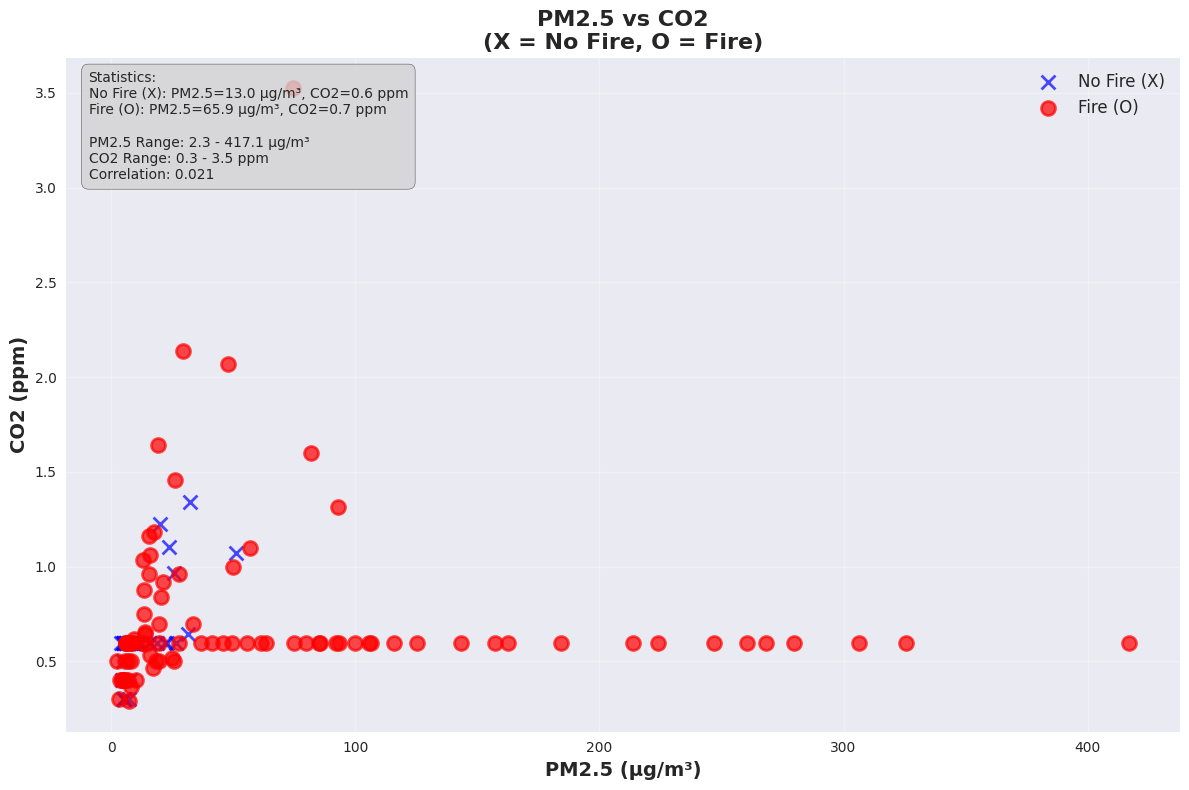

PM2.5 vs CO2 ANALYSIS
No Fire days: 37 (Blue X markers)
Fire days: 86 (Red O markers)
PM2.5 difference: 52.9 µg/m³
CO2 difference: 0.1 ppm

Correlation Analysis:
PM2.5 vs CO2 correlation: 0.021
PM2.5 vs Fire correlation: 0.317
CO2 vs Fire correlation: 0.114

Data Summary:
PM2.5 - No Fire: Mean=13.0, Std=10.4
PM2.5 - Fire: Mean=65.9, Std=87.1
CO2 - No Fire: Mean=0.6, Std=0.2
CO2 - Fire: Mean=0.7, Std=0.5

Key Insights:
- Weak correlation between PM2.5 and CO2 (0.021)
- PM2.5 is more predictive of fire than CO2


In [48]:
# ===== PM2.5 vs CO2 SCATTER PLOT =====
# Scatter plot with PM2.5 on x-axis, CO2 on y-axis, and different markers for fire/no fire

plt.figure(figsize=(12, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['PM25'], no_fire_data['CO2'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
plt.scatter(fire_data['PM25'], fire_data['CO2'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

# Customize the plot
plt.xlabel('PM2.5 (µg/m³)', fontsize=14, fontweight='bold')
plt.ylabel('CO2 (ppm)', fontsize=14, fontweight='bold')
plt.title('PM2.5 vs CO2\n(X = No Fire, O = Fire)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics
no_fire_pm25_mean = no_fire_data['PM25'].mean()
fire_pm25_mean = fire_data['PM25'].mean()
no_fire_co2_mean = no_fire_data['CO2'].mean()
fire_co2_mean = fire_data['CO2'].mean()

# Add text box with statistics
stats_text = f"""Statistics:
No Fire (X): PM2.5={no_fire_pm25_mean:.1f} µg/m³, CO2={no_fire_co2_mean:.1f} ppm
Fire (O): PM2.5={fire_pm25_mean:.1f} µg/m³, CO2={fire_co2_mean:.1f} ppm

PM2.5 Range: {df['PM25'].min():.1f} - {df['PM25'].max():.1f} µg/m³
CO2 Range: {df['CO2'].min():.1f} - {df['CO2'].max():.1f} ppm
Correlation: {df['PM25'].corr(df['CO2']):.3f}"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*60)
print("PM2.5 vs CO2 ANALYSIS")
print("="*60)
print(f"No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"Fire days: {len(fire_data)} (Red O markers)")
print(f"PM2.5 difference: {abs(fire_pm25_mean - no_fire_pm25_mean):.1f} µg/m³")
print(f"CO2 difference: {abs(fire_co2_mean - no_fire_co2_mean):.1f} ppm")

# Calculate correlations
pm25_co2_corr = df['PM25'].corr(df['CO2'])
pm25_fire_corr = df['PM25'].corr(df['yn'])
co2_fire_corr = df['CO2'].corr(df['yn'])

print(f"\nCorrelation Analysis:")
print(f"PM2.5 vs CO2 correlation: {pm25_co2_corr:.3f}")
print(f"PM2.5 vs Fire correlation: {pm25_fire_corr:.3f}")
print(f"CO2 vs Fire correlation: {co2_fire_corr:.3f}")

print(f"\nData Summary:")
print(f"PM2.5 - No Fire: Mean={no_fire_pm25_mean:.1f}, Std={no_fire_data['PM25'].std():.1f}")
print(f"PM2.5 - Fire: Mean={fire_pm25_mean:.1f}, Std={fire_data['PM25'].std():.1f}")
print(f"CO2 - No Fire: Mean={no_fire_co2_mean:.1f}, Std={no_fire_data['CO2'].std():.1f}")
print(f"CO2 - Fire: Mean={fire_co2_mean:.1f}, Std={fire_data['CO2'].std():.1f}")

print(f"\nKey Insights:")
if pm25_co2_corr > 0.3:
    print(f"- Strong positive correlation between PM2.5 and CO2 ({pm25_co2_corr:.3f})")
elif pm25_co2_corr < -0.3:
    print(f"- Strong negative correlation between PM2.5 and CO2 ({pm25_co2_corr:.3f})")
else:
    print(f"- Weak correlation between PM2.5 and CO2 ({pm25_co2_corr:.3f})")

if abs(pm25_fire_corr) > abs(co2_fire_corr):
    print(f"- PM2.5 is more predictive of fire than CO2")
else:
    print(f"- CO2 is more predictive of fire than PM2.5")


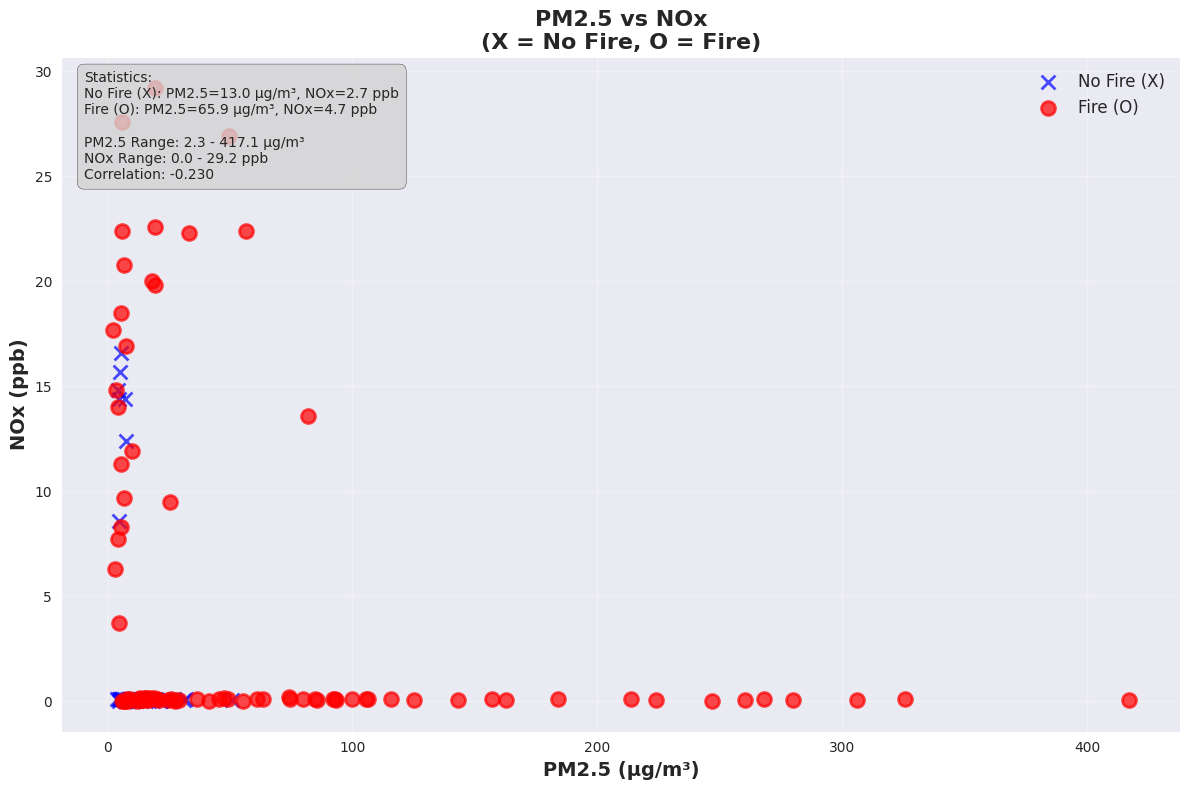

PM2.5 vs NOx ANALYSIS
No Fire days: 37 (Blue X markers)
Fire days: 86 (Red O markers)
PM2.5 difference: 52.9 µg/m³
NOx difference: 2.0 ppb

Correlation Analysis:
PM2.5 vs NOx correlation: -0.230
PM2.5 vs Fire correlation: 0.317
NOx vs Fire correlation: 0.122

Data Summary:
PM2.5 - No Fire: Mean=13.0, Std=10.4
PM2.5 - Fire: Mean=65.9, Std=87.1
NOx - No Fire: Mean=2.7, Std=5.6
NOx - Fire: Mean=4.7, Std=8.3

Key Insights:
- Weak correlation between PM2.5 and NOx (-0.230)
- PM2.5 is more predictive of fire than NOx

Air Quality Comparison:
PM2.5 vs CO2 correlation: 0.021
PM2.5 vs NOx correlation: -0.230
CO2 vs NOx correlation: -0.165

Most predictive air quality measure: PM2.5 (correlation: 0.317)


In [49]:
# ===== PM2.5 vs NOx SCATTER PLOT =====
# Scatter plot with PM2.5 on x-axis, NOx on y-axis, and different markers for fire/no fire

plt.figure(figsize=(12, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['PM25'], no_fire_data['NOx'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
plt.scatter(fire_data['PM25'], fire_data['NOx'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

# Customize the plot
plt.xlabel('PM2.5 (µg/m³)', fontsize=14, fontweight='bold')
plt.ylabel('NOx (ppb)', fontsize=14, fontweight='bold')
plt.title('PM2.5 vs NOx\n(X = No Fire, O = Fire)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics
no_fire_pm25_mean = no_fire_data['PM25'].mean()
fire_pm25_mean = fire_data['PM25'].mean()
no_fire_nox_mean = no_fire_data['NOx'].mean()
fire_nox_mean = fire_data['NOx'].mean()

# Add text box with statistics
stats_text = f"""Statistics:
No Fire (X): PM2.5={no_fire_pm25_mean:.1f} µg/m³, NOx={no_fire_nox_mean:.1f} ppb
Fire (O): PM2.5={fire_pm25_mean:.1f} µg/m³, NOx={fire_nox_mean:.1f} ppb

PM2.5 Range: {df['PM25'].min():.1f} - {df['PM25'].max():.1f} µg/m³
NOx Range: {df['NOx'].min():.1f} - {df['NOx'].max():.1f} ppb
Correlation: {df['PM25'].corr(df['NOx']):.3f}"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*60)
print("PM2.5 vs NOx ANALYSIS")
print("="*60)
print(f"No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"Fire days: {len(fire_data)} (Red O markers)")
print(f"PM2.5 difference: {abs(fire_pm25_mean - no_fire_pm25_mean):.1f} µg/m³")
print(f"NOx difference: {abs(fire_nox_mean - no_fire_nox_mean):.1f} ppb")

# Calculate correlations
pm25_nox_corr = df['PM25'].corr(df['NOx'])
pm25_fire_corr = df['PM25'].corr(df['yn'])
nox_fire_corr = df['NOx'].corr(df['yn'])

print(f"\nCorrelation Analysis:")
print(f"PM2.5 vs NOx correlation: {pm25_nox_corr:.3f}")
print(f"PM2.5 vs Fire correlation: {pm25_fire_corr:.3f}")
print(f"NOx vs Fire correlation: {nox_fire_corr:.3f}")

print(f"\nData Summary:")
print(f"PM2.5 - No Fire: Mean={no_fire_pm25_mean:.1f}, Std={no_fire_data['PM25'].std():.1f}")
print(f"PM2.5 - Fire: Mean={fire_pm25_mean:.1f}, Std={fire_data['PM25'].std():.1f}")
print(f"NOx - No Fire: Mean={no_fire_nox_mean:.1f}, Std={no_fire_data['NOx'].std():.1f}")
print(f"NOx - Fire: Mean={fire_nox_mean:.1f}, Std={fire_data['NOx'].std():.1f}")

print(f"\nKey Insights:")
if pm25_nox_corr > 0.3:
    print(f"- Strong positive correlation between PM2.5 and NOx ({pm25_nox_corr:.3f})")
elif pm25_nox_corr < -0.3:
    print(f"- Strong negative correlation between PM2.5 and NOx ({pm25_nox_corr:.3f})")
else:
    print(f"- Weak correlation between PM2.5 and NOx ({pm25_nox_corr:.3f})")

if abs(pm25_fire_corr) > abs(nox_fire_corr):
    print(f"- PM2.5 is more predictive of fire than NOx")
else:
    print(f"- NOx is more predictive of fire than PM2.5")

print(f"\nAir Quality Comparison:")
print(f"PM2.5 vs CO2 correlation: {df['PM25'].corr(df['CO2']):.3f}")
print(f"PM2.5 vs NOx correlation: {pm25_nox_corr:.3f}")
print(f"CO2 vs NOx correlation: {df['CO2'].corr(df['NOx']):.3f}")

# Determine which air quality measure is most predictive
air_quality_measures = {
    'PM2.5': abs(pm25_fire_corr),
    'CO2': abs(df['CO2'].corr(df['yn'])),
    'NOx': abs(nox_fire_corr)
}
most_predictive = max(air_quality_measures, key=air_quality_measures.get)
print(f"\nMost predictive air quality measure: {most_predictive} (correlation: {air_quality_measures[most_predictive]:.3f})")


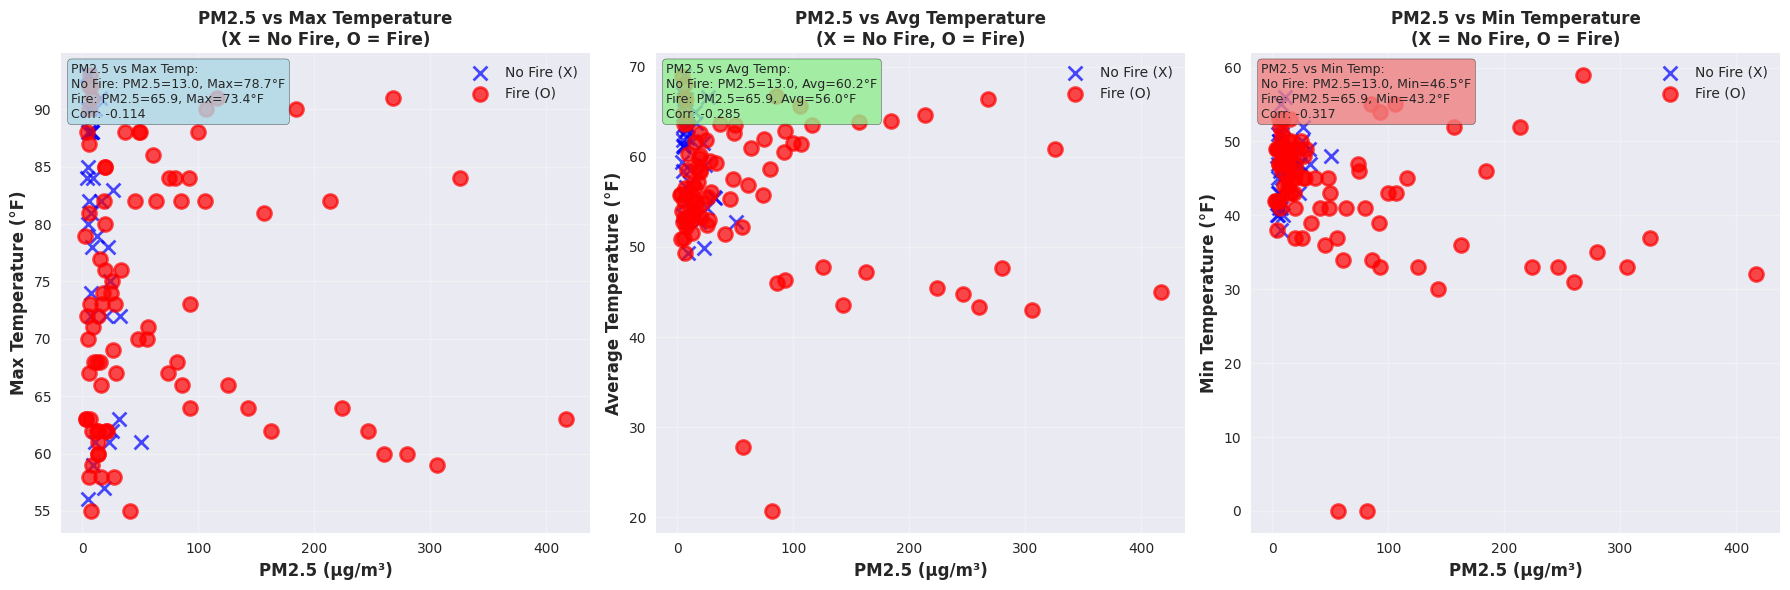

PM2.5 vs TEMPERATURE ANALYSIS

1. PM2.5 vs Max Temperature:
   No Fire: PM2.5 = 13.0 µg/m³, Max Temp = 78.7°F
   Fire: PM2.5 = 65.9 µg/m³, Max Temp = 73.4°F
   PM2.5 difference: 52.9 µg/m³
   Temp difference: 5.3°F
   Correlation: -0.114

2. PM2.5 vs Average Temperature:
   No Fire: PM2.5 = 13.0 µg/m³, Avg Temp = 60.2°F
   Fire: PM2.5 = 65.9 µg/m³, Avg Temp = 56.0°F
   PM2.5 difference: 52.9 µg/m³
   Temp difference: 4.2°F
   Correlation: -0.285

3. PM2.5 vs Min Temperature:
   No Fire: PM2.5 = 13.0 µg/m³, Min Temp = 46.5°F
   Fire: PM2.5 = 65.9 µg/m³, Min Temp = 43.2°F
   PM2.5 difference: 52.9 µg/m³
   Temp difference: 3.4°F
   Correlation: -0.317

4. Temperature Correlation Analysis:
   PM2.5 vs Max Temp correlation: -0.114
   PM2.5 vs Avg Temp correlation: -0.285
   PM2.5 vs Min Temp correlation: -0.317

5. Key Insights:
   - Max temperature shows larger difference between fire/no-fire
   - PM2.5 shows negative correlation with temperature
   - Min_Temp has the strongest correlatio

In [50]:
# ===== PM2.5 vs TEMPERATURE SCATTER PLOTS =====
# Three scatter plots showing PM2.5 vs temperature relationships with fire/no fire markers

# Create subplots for the three temperature combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: PM2.5 vs Max Temperature
ax1 = axes[0]
ax1.scatter(no_fire_data['PM25'], no_fire_data['Max_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['PM25'], fire_data['Max_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Max Temperature (°F)', fontsize=12, fontweight='bold')
ax1.set_title('PM2.5 vs Max Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_pm25 = no_fire_data['PM25'].mean()
fire_pm25 = fire_data['PM25'].mean()
no_fire_max_temp = no_fire_data['Max_Temp'].mean()
fire_max_temp = fire_data['Max_Temp'].mean()

stats_text1 = f"""PM2.5 vs Max Temp:
No Fire: PM2.5={no_fire_pm25:.1f}, Max={no_fire_max_temp:.1f}°F
Fire: PM2.5={fire_pm25:.1f}, Max={fire_max_temp:.1f}°F
Corr: {df['PM25'].corr(df['Max_Temp']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: PM2.5 vs Average Temperature
ax2 = axes[1]
ax2.scatter(no_fire_data['PM25'], no_fire_data['Avg_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['PM25'], fire_data['Avg_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
ax2.set_title('PM2.5 vs Avg Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_temp = no_fire_data['Avg_Temp'].mean()
fire_avg_temp = fire_data['Avg_Temp'].mean()

stats_text2 = f"""PM2.5 vs Avg Temp:
No Fire: PM2.5={no_fire_pm25:.1f}, Avg={no_fire_avg_temp:.1f}°F
Fire: PM2.5={fire_pm25:.1f}, Avg={fire_avg_temp:.1f}°F
Corr: {df['PM25'].corr(df['Avg_Temp']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: PM2.5 vs Min Temperature
ax3 = axes[2]
ax3.scatter(no_fire_data['PM25'], no_fire_data['Min_Temp'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['PM25'], fire_data['Min_Temp'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Min Temperature (°F)', fontsize=12, fontweight='bold')
ax3.set_title('PM2.5 vs Min Temperature\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_min_temp = no_fire_data['Min_Temp'].mean()
fire_min_temp = fire_data['Min_Temp'].mean()

stats_text3 = f"""PM2.5 vs Min Temp:
No Fire: PM2.5={no_fire_pm25:.1f}, Min={no_fire_min_temp:.1f}°F
Fire: PM2.5={fire_pm25:.1f}, Min={fire_min_temp:.1f}°F
Corr: {df['PM25'].corr(df['Min_Temp']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("PM2.5 vs TEMPERATURE ANALYSIS")
print("="*80)

print(f"\n1. PM2.5 vs Max Temperature:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Max Temp = {no_fire_max_temp:.1f}°F")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Max Temp = {fire_max_temp:.1f}°F")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Temp difference: {abs(fire_max_temp - no_fire_max_temp):.1f}°F")
print(f"   Correlation: {df['PM25'].corr(df['Max_Temp']):.3f}")

print(f"\n2. PM2.5 vs Average Temperature:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Avg Temp = {no_fire_avg_temp:.1f}°F")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Avg Temp = {fire_avg_temp:.1f}°F")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Temp difference: {abs(fire_avg_temp - no_fire_avg_temp):.1f}°F")
print(f"   Correlation: {df['PM25'].corr(df['Avg_Temp']):.3f}")

print(f"\n3. PM2.5 vs Min Temperature:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Min Temp = {no_fire_min_temp:.1f}°F")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Min Temp = {fire_min_temp:.1f}°F")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Temp difference: {abs(fire_min_temp - no_fire_min_temp):.1f}°F")
print(f"   Correlation: {df['PM25'].corr(df['Min_Temp']):.3f}")

print(f"\n4. Temperature Correlation Analysis:")
print(f"   PM2.5 vs Max Temp correlation: {df['PM25'].corr(df['Max_Temp']):.3f}")
print(f"   PM2.5 vs Avg Temp correlation: {df['PM25'].corr(df['Avg_Temp']):.3f}")
print(f"   PM2.5 vs Min Temp correlation: {df['PM25'].corr(df['Min_Temp']):.3f}")

# Determine which temperature measure correlates most with PM2.5
temp_correlations = {
    'Max_Temp': abs(df['PM25'].corr(df['Max_Temp'])),
    'Avg_Temp': abs(df['PM25'].corr(df['Avg_Temp'])),
    'Min_Temp': abs(df['PM25'].corr(df['Min_Temp']))
}
best_temp_corr = max(temp_correlations, key=temp_correlations.get)

print(f"\n5. Key Insights:")
print(f"   - {'Max' if abs(fire_max_temp - no_fire_max_temp) > abs(fire_avg_temp - no_fire_avg_temp) else 'Average'} temperature shows larger difference between fire/no-fire")
print(f"   - PM2.5 shows {'positive' if df['PM25'].corr(df['Avg_Temp']) > 0 else 'negative'} correlation with temperature")
print(f"   - {best_temp_corr} has the strongest correlation with PM2.5 ({temp_correlations[best_temp_corr]:.3f})")
print(f"   - Temperature range: Max {df['Max_Temp'].min():.1f}-{df['Max_Temp'].max():.1f}°F, Avg {df['Avg_Temp'].min():.1f}-{df['Avg_Temp'].max():.1f}°F, Min {df['Min_Temp'].min():.1f}-{df['Min_Temp'].max():.1f}°F")

print(f"\n6. Fire Prediction Insights:")
print(f"   - Fire days tend to have {'higher' if fire_pm25 > no_fire_pm25 else 'lower'} PM2.5 levels")
print(f"   - Fire days tend to have {'higher' if fire_avg_temp > no_fire_avg_temp else 'lower'} average temperatures")
print(f"   - PM2.5 and temperature {'are' if abs(df['PM25'].corr(df['Avg_Temp'])) > 0.3 else 'are not'} strongly correlated")


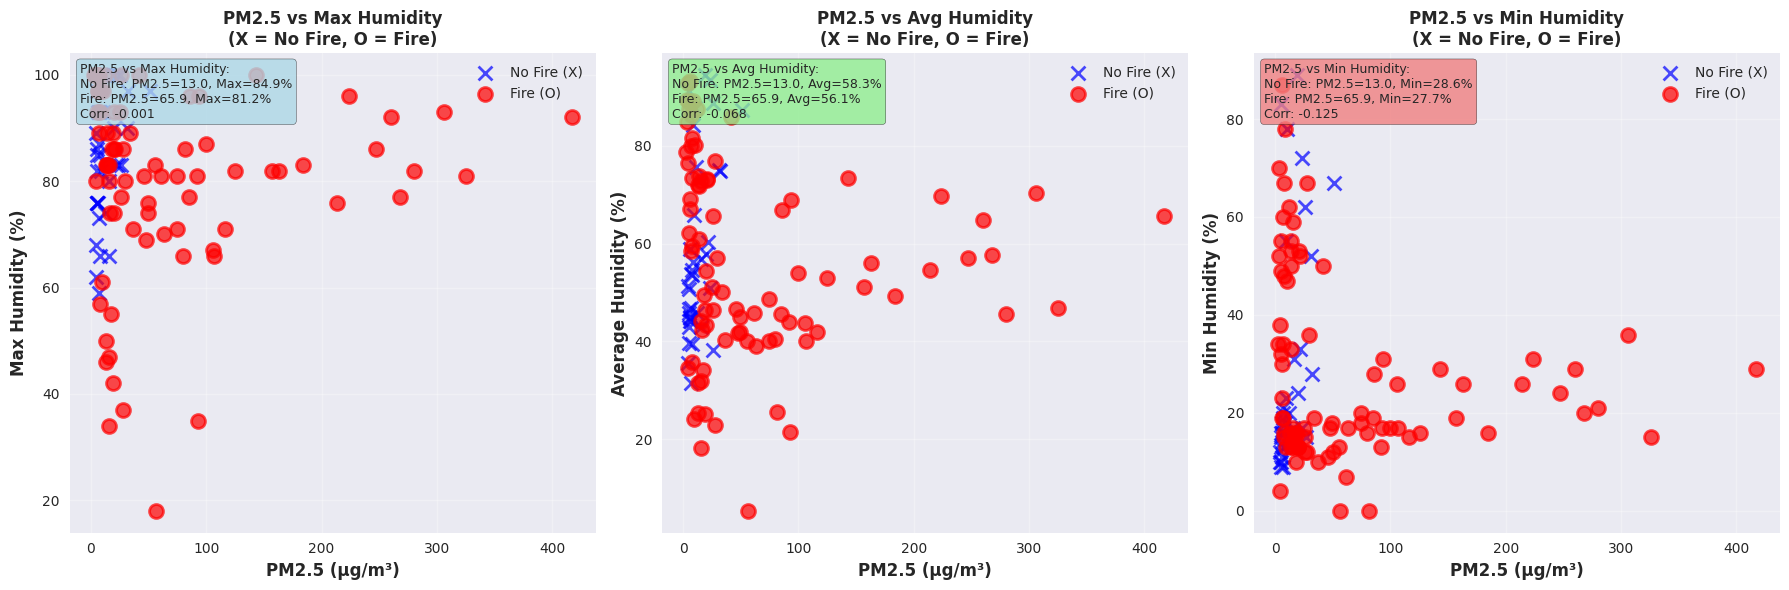

PM2.5 vs HUMIDITY ANALYSIS

1. PM2.5 vs Max Humidity:
   No Fire: PM2.5 = 13.0 µg/m³, Max Humidity = 84.9%
   Fire: PM2.5 = 65.9 µg/m³, Max Humidity = 81.2%
   PM2.5 difference: 52.9 µg/m³
   Humidity difference: 3.7%
   Correlation: -0.001

2. PM2.5 vs Average Humidity:
   No Fire: PM2.5 = 13.0 µg/m³, Avg Humidity = 58.3%
   Fire: PM2.5 = 65.9 µg/m³, Avg Humidity = 56.1%
   PM2.5 difference: 52.9 µg/m³
   Humidity difference: 2.2%
   Correlation: -0.068

3. PM2.5 vs Min Humidity:
   No Fire: PM2.5 = 13.0 µg/m³, Min Humidity = 28.6%
   Fire: PM2.5 = 65.9 µg/m³, Min Humidity = 27.7%
   PM2.5 difference: 52.9 µg/m³
   Humidity difference: 0.9%
   Correlation: -0.125

4. Humidity Correlation Analysis:
   PM2.5 vs Max Humidity correlation: -0.001
   PM2.5 vs Avg Humidity correlation: -0.068
   PM2.5 vs Min Humidity correlation: -0.125

5. Key Insights:
   - Max humidity shows larger difference between fire/no-fire
   - PM2.5 shows negative correlation with humidity
   - Min_Humidity has th

In [51]:
# ===== PM2.5 vs HUMIDITY SCATTER PLOTS =====
# Three scatter plots showing PM2.5 vs humidity relationships with fire/no fire markers

# Create subplots for the three humidity combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: PM2.5 vs Max Humidity
ax1 = axes[0]
ax1.scatter(no_fire_data['PM25'], no_fire_data['Max_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['PM25'], fire_data['Max_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Max Humidity (%)', fontsize=12, fontweight='bold')
ax1.set_title('PM2.5 vs Max Humidity\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_pm25 = no_fire_data['PM25'].mean()
fire_pm25 = fire_data['PM25'].mean()
no_fire_max_humidity = no_fire_data['Max_Humidity'].mean()
fire_max_humidity = fire_data['Max_Humidity'].mean()

stats_text1 = f"""PM2.5 vs Max Humidity:
No Fire: PM2.5={no_fire_pm25:.1f}, Max={no_fire_max_humidity:.1f}%
Fire: PM2.5={fire_pm25:.1f}, Max={fire_max_humidity:.1f}%
Corr: {df['PM25'].corr(df['Max_Humidity']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: PM2.5 vs Average Humidity
ax2 = axes[1]
ax2.scatter(no_fire_data['PM25'], no_fire_data['Avg_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['PM25'], fire_data['Avg_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Humidity (%)', fontsize=12, fontweight='bold')
ax2.set_title('PM2.5 vs Avg Humidity\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_humidity = no_fire_data['Avg_Humidity'].mean()
fire_avg_humidity = fire_data['Avg_Humidity'].mean()

stats_text2 = f"""PM2.5 vs Avg Humidity:
No Fire: PM2.5={no_fire_pm25:.1f}, Avg={no_fire_avg_humidity:.1f}%
Fire: PM2.5={fire_pm25:.1f}, Avg={fire_avg_humidity:.1f}%
Corr: {df['PM25'].corr(df['Avg_Humidity']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: PM2.5 vs Min Humidity
ax3 = axes[2]
ax3.scatter(no_fire_data['PM25'], no_fire_data['Min_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['PM25'], fire_data['Min_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Min Humidity (%)', fontsize=12, fontweight='bold')
ax3.set_title('PM2.5 vs Min Humidity\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_min_humidity = no_fire_data['Min_Humidity'].mean()
fire_min_humidity = fire_data['Min_Humidity'].mean()

stats_text3 = f"""PM2.5 vs Min Humidity:
No Fire: PM2.5={no_fire_pm25:.1f}, Min={no_fire_min_humidity:.1f}%
Fire: PM2.5={fire_pm25:.1f}, Min={fire_min_humidity:.1f}%
Corr: {df['PM25'].corr(df['Min_Humidity']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("PM2.5 vs HUMIDITY ANALYSIS")
print("="*80)

print(f"\n1. PM2.5 vs Max Humidity:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Max Humidity = {no_fire_max_humidity:.1f}%")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Max Humidity = {fire_max_humidity:.1f}%")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Humidity difference: {abs(fire_max_humidity - no_fire_max_humidity):.1f}%")
print(f"   Correlation: {df['PM25'].corr(df['Max_Humidity']):.3f}")

print(f"\n2. PM2.5 vs Average Humidity:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Avg Humidity = {no_fire_avg_humidity:.1f}%")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Avg Humidity = {fire_avg_humidity:.1f}%")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Humidity difference: {abs(fire_avg_humidity - no_fire_avg_humidity):.1f}%")
print(f"   Correlation: {df['PM25'].corr(df['Avg_Humidity']):.3f}")

print(f"\n3. PM2.5 vs Min Humidity:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Min Humidity = {no_fire_min_humidity:.1f}%")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Min Humidity = {fire_min_humidity:.1f}%")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Humidity difference: {abs(fire_min_humidity - no_fire_min_humidity):.1f}%")
print(f"   Correlation: {df['PM25'].corr(df['Min_Humidity']):.3f}")

print(f"\n4. Humidity Correlation Analysis:")
print(f"   PM2.5 vs Max Humidity correlation: {df['PM25'].corr(df['Max_Humidity']):.3f}")
print(f"   PM2.5 vs Avg Humidity correlation: {df['PM25'].corr(df['Avg_Humidity']):.3f}")
print(f"   PM2.5 vs Min Humidity correlation: {df['PM25'].corr(df['Min_Humidity']):.3f}")

# Determine which humidity measure correlates most with PM2.5
humidity_correlations = {
    'Max_Humidity': abs(df['PM25'].corr(df['Max_Humidity'])),
    'Avg_Humidity': abs(df['PM25'].corr(df['Avg_Humidity'])),
    'Min_Humidity': abs(df['PM25'].corr(df['Min_Humidity']))
}
best_humidity_corr = max(humidity_correlations, key=humidity_correlations.get)

print(f"\n5. Key Insights:")
print(f"   - {'Max' if abs(fire_max_humidity - no_fire_max_humidity) > abs(fire_avg_humidity - no_fire_avg_humidity) else 'Average'} humidity shows larger difference between fire/no-fire")
print(f"   - PM2.5 shows {'positive' if df['PM25'].corr(df['Avg_Humidity']) > 0 else 'negative'} correlation with humidity")
print(f"   - {best_humidity_corr} has the strongest correlation with PM2.5 ({humidity_correlations[best_humidity_corr]:.3f})")
print(f"   - Humidity range: Max {df['Max_Humidity'].min():.1f}-{df['Max_Humidity'].max():.1f}%, Avg {df['Avg_Humidity'].min():.1f}-{df['Avg_Humidity'].max():.1f}%, Min {df['Min_Humidity'].min():.1f}-{df['Min_Humidity'].max():.1f}%")

print(f"\n6. Fire Prediction Insights:")
print(f"   - Fire days tend to have {'higher' if fire_pm25 > no_fire_pm25 else 'lower'} PM2.5 levels")
print(f"   - Fire days tend to have {'higher' if fire_avg_humidity > no_fire_avg_humidity else 'lower'} average humidity")
print(f"   - PM2.5 and humidity {'are' if abs(df['PM25'].corr(df['Avg_Humidity'])) > 0.3 else 'are not'} strongly correlated")

print(f"\n7. Environmental Pattern Analysis:")
print(f"   - Humidity typically {'increases' if df['Avg_Humidity'].corr(df['PM25']) > 0 else 'decreases'} with PM2.5 levels")
print(f"   - {'High' if abs(fire_avg_humidity - no_fire_avg_humidity) > 5 else 'Low'} humidity difference between fire/no-fire days")
print(f"   - Humidity variability: Max range {df['Max_Humidity'].max() - df['Max_Humidity'].min():.1f}%, Avg range {df['Avg_Humidity'].max() - df['Avg_Humidity'].min():.1f}%, Min range {df['Min_Humidity'].max() - df['Min_Humidity'].min():.1f}%")


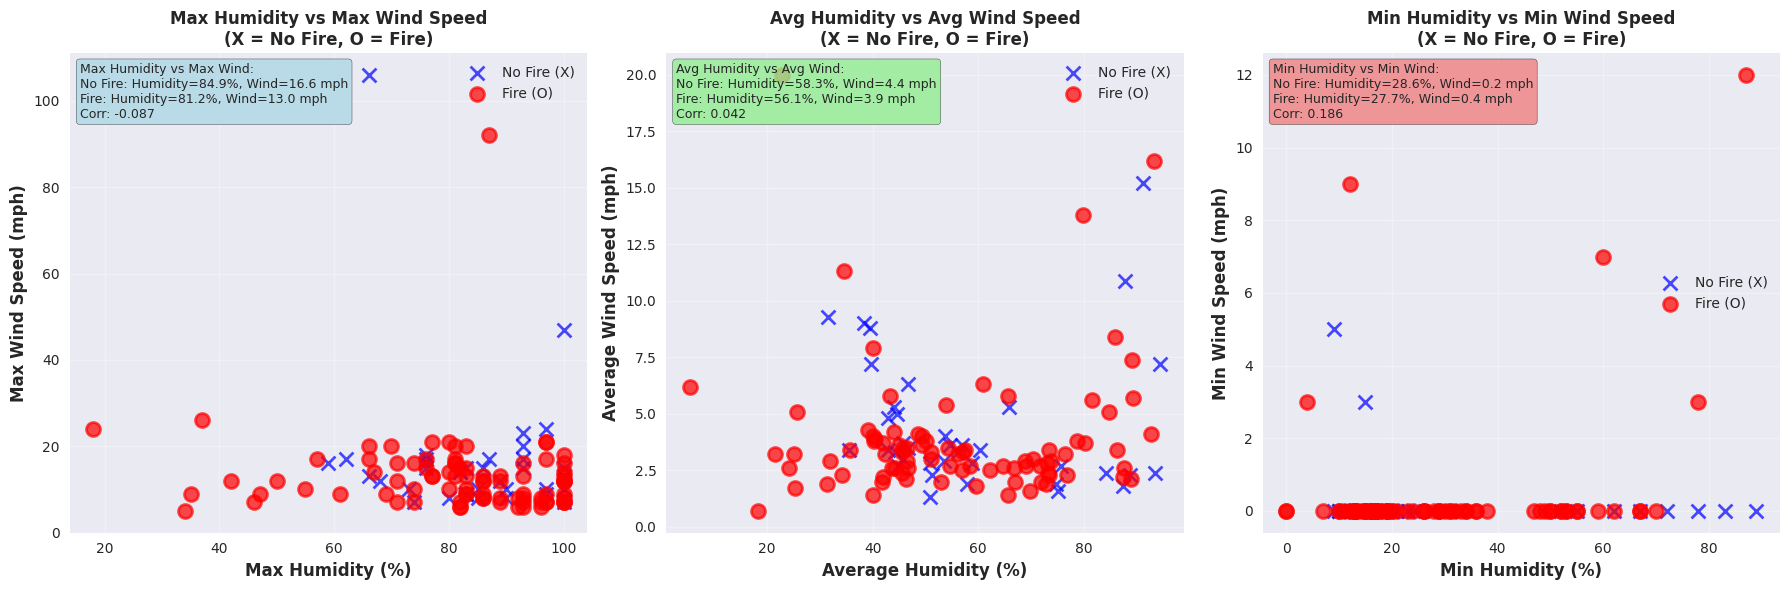

HUMIDITY vs WIND SPEED ANALYSIS

1. Max Humidity vs Max Wind Speed:
   No Fire: Humidity = 84.9%, Wind = 16.6 mph
   Fire: Humidity = 81.2%, Wind = 13.0 mph
   Humidity difference: 3.7%
   Wind difference: 3.6 mph
   Correlation: -0.087

2. Average Humidity vs Average Wind Speed:
   No Fire: Humidity = 58.3%, Wind = 4.4 mph
   Fire: Humidity = 56.1%, Wind = 3.9 mph
   Humidity difference: 2.2%
   Wind difference: 0.5 mph
   Correlation: 0.042

3. Min Humidity vs Min Wind Speed:
   No Fire: Humidity = 28.6%, Wind = 0.2 mph
   Fire: Humidity = 27.7%, Wind = 0.4 mph
   Humidity difference: 0.9%
   Wind difference: 0.2 mph
   Correlation: 0.186

4. Humidity-Wind Correlation Analysis:
   Max Humidity vs Max Wind correlation: -0.087
   Avg Humidity vs Avg Wind correlation: 0.042
   Min Humidity vs Min Wind correlation: 0.186

5. Key Insights:
   - Max humidity shows larger difference between fire/no-fire
   - Max wind speed shows larger difference between fire/no-fire
   - Min humidity-wind 

In [52]:
# ===== HUMIDITY vs WIND SPEED SCATTER PLOTS =====
# Three scatter plots showing humidity vs wind speed relationships with fire/no fire markers

# Create subplots for the three combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: Max Humidity vs Max Wind Speed
ax1 = axes[0]
ax1.scatter(no_fire_data['Max_Humidity'], no_fire_data['Max_Wind_Speed'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['Max_Humidity'], fire_data['Max_Wind_Speed'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('Max Humidity (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Max Wind Speed (mph)', fontsize=12, fontweight='bold')
ax1.set_title('Max Humidity vs Max Wind Speed\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_max_humidity = no_fire_data['Max_Humidity'].mean()
fire_max_humidity = fire_data['Max_Humidity'].mean()
no_fire_max_wind = no_fire_data['Max_Wind_Speed'].mean()
fire_max_wind = fire_data['Max_Wind_Speed'].mean()

stats_text1 = f"""Max Humidity vs Max Wind:
No Fire: Humidity={no_fire_max_humidity:.1f}%, Wind={no_fire_max_wind:.1f} mph
Fire: Humidity={fire_max_humidity:.1f}%, Wind={fire_max_wind:.1f} mph
Corr: {df['Max_Humidity'].corr(df['Max_Wind_Speed']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: Average Humidity vs Average Wind Speed
ax2 = axes[1]
ax2.scatter(no_fire_data['Avg_Humidity'], no_fire_data['Avg_Wind_Speed'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['Avg_Humidity'], fire_data['Avg_Wind_Speed'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('Average Humidity (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Wind Speed (mph)', fontsize=12, fontweight='bold')
ax2.set_title('Avg Humidity vs Avg Wind Speed\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_humidity = no_fire_data['Avg_Humidity'].mean()
fire_avg_humidity = fire_data['Avg_Humidity'].mean()
no_fire_avg_wind = no_fire_data['Avg_Wind_Speed'].mean()
fire_avg_wind = fire_data['Avg_Wind_Speed'].mean()

stats_text2 = f"""Avg Humidity vs Avg Wind:
No Fire: Humidity={no_fire_avg_humidity:.1f}%, Wind={no_fire_avg_wind:.1f} mph
Fire: Humidity={fire_avg_humidity:.1f}%, Wind={fire_avg_wind:.1f} mph
Corr: {df['Avg_Humidity'].corr(df['Avg_Wind_Speed']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: Min Humidity vs Min Wind Speed
ax3 = axes[2]
ax3.scatter(no_fire_data['Min_Humidity'], no_fire_data['Min_Wind_Speed'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['Min_Humidity'], fire_data['Min_Wind_Speed'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('Min Humidity (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Min Wind Speed (mph)', fontsize=12, fontweight='bold')
ax3.set_title('Min Humidity vs Min Wind Speed\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_min_humidity = no_fire_data['Min_Humidity'].mean()
fire_min_humidity = fire_data['Min_Humidity'].mean()
no_fire_min_wind = no_fire_data['Min_Wind_Speed'].mean()
fire_min_wind = fire_data['Min_Wind_Speed'].mean()

stats_text3 = f"""Min Humidity vs Min Wind:
No Fire: Humidity={no_fire_min_humidity:.1f}%, Wind={no_fire_min_wind:.1f} mph
Fire: Humidity={fire_min_humidity:.1f}%, Wind={fire_min_wind:.1f} mph
Corr: {df['Min_Humidity'].corr(df['Min_Wind_Speed']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("HUMIDITY vs WIND SPEED ANALYSIS")
print("="*80)

print(f"\n1. Max Humidity vs Max Wind Speed:")
print(f"   No Fire: Humidity = {no_fire_max_humidity:.1f}%, Wind = {no_fire_max_wind:.1f} mph")
print(f"   Fire: Humidity = {fire_max_humidity:.1f}%, Wind = {fire_max_wind:.1f} mph")
print(f"   Humidity difference: {abs(fire_max_humidity - no_fire_max_humidity):.1f}%")
print(f"   Wind difference: {abs(fire_max_wind - no_fire_max_wind):.1f} mph")
print(f"   Correlation: {df['Max_Humidity'].corr(df['Max_Wind_Speed']):.3f}")

print(f"\n2. Average Humidity vs Average Wind Speed:")
print(f"   No Fire: Humidity = {no_fire_avg_humidity:.1f}%, Wind = {no_fire_avg_wind:.1f} mph")
print(f"   Fire: Humidity = {fire_avg_humidity:.1f}%, Wind = {fire_avg_wind:.1f} mph")
print(f"   Humidity difference: {abs(fire_avg_humidity - no_fire_avg_humidity):.1f}%")
print(f"   Wind difference: {abs(fire_avg_wind - no_fire_avg_wind):.1f} mph")
print(f"   Correlation: {df['Avg_Humidity'].corr(df['Avg_Wind_Speed']):.3f}")

print(f"\n3. Min Humidity vs Min Wind Speed:")
print(f"   No Fire: Humidity = {no_fire_min_humidity:.1f}%, Wind = {no_fire_min_wind:.1f} mph")
print(f"   Fire: Humidity = {fire_min_humidity:.1f}%, Wind = {fire_min_wind:.1f} mph")
print(f"   Humidity difference: {abs(fire_min_humidity - no_fire_min_humidity):.1f}%")
print(f"   Wind difference: {abs(fire_min_wind - no_fire_min_wind):.1f} mph")
print(f"   Correlation: {df['Min_Humidity'].corr(df['Min_Wind_Speed']):.3f}")

print(f"\n4. Humidity-Wind Correlation Analysis:")
print(f"   Max Humidity vs Max Wind correlation: {df['Max_Humidity'].corr(df['Max_Wind_Speed']):.3f}")
print(f"   Avg Humidity vs Avg Wind correlation: {df['Avg_Humidity'].corr(df['Avg_Wind_Speed']):.3f}")
print(f"   Min Humidity vs Min Wind correlation: {df['Min_Humidity'].corr(df['Min_Wind_Speed']):.3f}")

# Determine which combination correlates most
humidity_wind_correlations = {
    'Max': abs(df['Max_Humidity'].corr(df['Max_Wind_Speed'])),
    'Avg': abs(df['Avg_Humidity'].corr(df['Avg_Wind_Speed'])),
    'Min': abs(df['Min_Humidity'].corr(df['Min_Wind_Speed']))
}
best_combo = max(humidity_wind_correlations, key=humidity_wind_correlations.get)

print(f"\n5. Key Insights:")
print(f"   - {'Max' if abs(fire_max_humidity - no_fire_max_humidity) > abs(fire_avg_humidity - no_fire_avg_humidity) else 'Average'} humidity shows larger difference between fire/no-fire")
print(f"   - {'Max' if abs(fire_max_wind - no_fire_max_wind) > abs(fire_avg_wind - no_fire_avg_wind) else 'Average'} wind speed shows larger difference between fire/no-fire")
print(f"   - {best_combo} humidity-wind combination has the strongest correlation ({humidity_wind_correlations[best_combo]:.3f})")
print(f"   - Humidity range: Max {df['Max_Humidity'].min():.1f}-{df['Max_Humidity'].max():.1f}%, Avg {df['Avg_Humidity'].min():.1f}-{df['Avg_Humidity'].max():.1f}%, Min {df['Min_Humidity'].min():.1f}-{df['Min_Humidity'].max():.1f}%")
print(f"   - Wind range: Max {df['Max_Wind_Speed'].min():.1f}-{df['Max_Wind_Speed'].max():.1f} mph, Avg {df['Avg_Wind_Speed'].min():.1f}-{df['Avg_Wind_Speed'].max():.1f} mph, Min {df['Min_Wind_Speed'].min():.1f}-{df['Min_Wind_Speed'].max():.1f} mph")

print(f"\n6. Fire Prediction Insights:")
print(f"   - Fire days tend to have {'higher' if fire_avg_humidity > no_fire_avg_humidity else 'lower'} average humidity")
print(f"   - Fire days tend to have {'higher' if fire_avg_wind > no_fire_avg_wind else 'lower'} average wind speed")
print(f"   - Humidity and wind speed {'are' if abs(df['Avg_Humidity'].corr(df['Avg_Wind_Speed'])) > 0.3 else 'are not'} strongly correlated")

print(f"\n7. Environmental Pattern Analysis:")
print(f"   - Humidity typically {'increases' if df['Avg_Humidity'].corr(df['Avg_Wind_Speed']) > 0 else 'decreases'} with wind speed")
print(f"   - {'High' if abs(fire_avg_humidity - no_fire_avg_humidity) > 5 else 'Low'} humidity difference between fire/no-fire days")
print(f"   - {'High' if abs(fire_avg_wind - no_fire_avg_wind) > 2 else 'Low'} wind speed difference between fire/no-fire days")
print(f"   - Wind variability: Max range {df['Max_Wind_Speed'].max() - df['Max_Wind_Speed'].min():.1f} mph, Avg range {df['Avg_Wind_Speed'].max() - df['Avg_Wind_Speed'].min():.1f} mph, Min range {df['Min_Wind_Speed'].max() - df['Min_Wind_Speed'].min():.1f} mph")


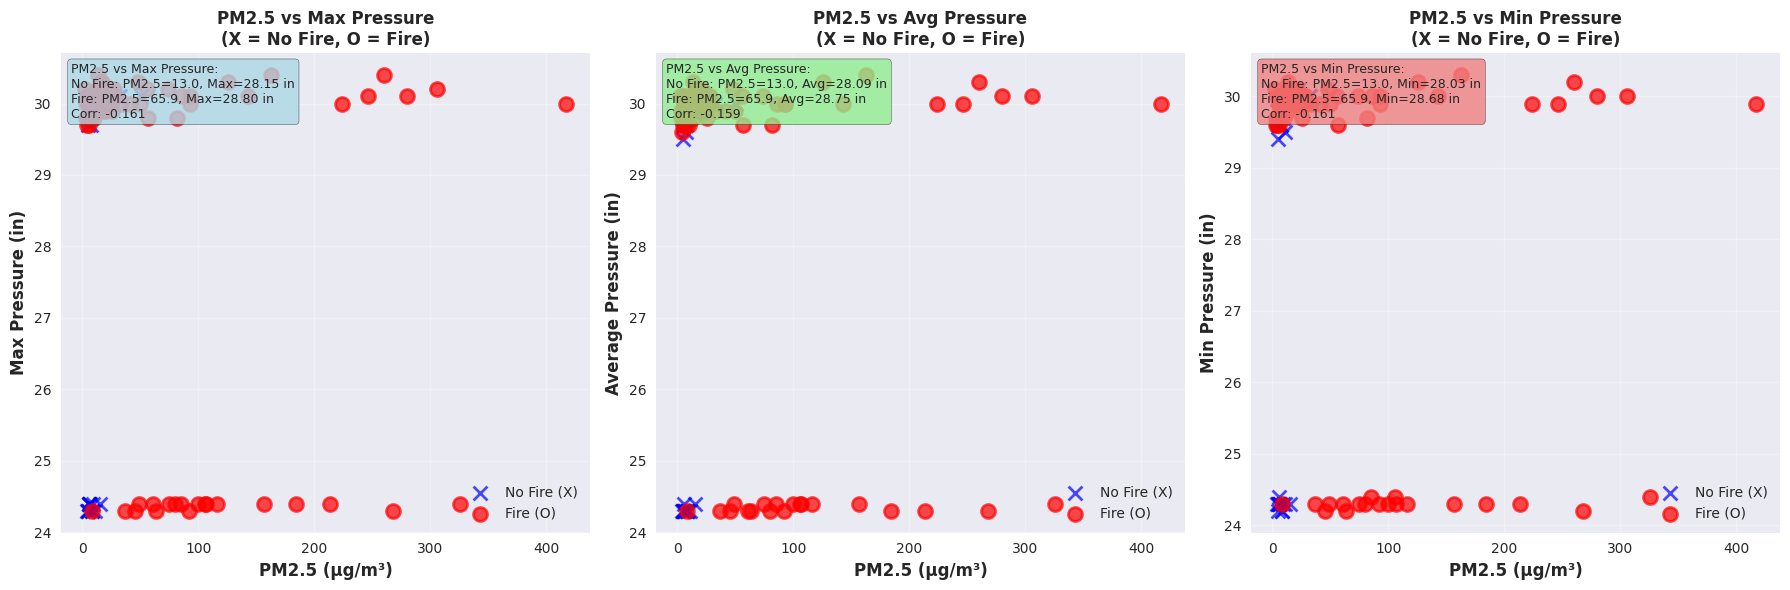

PM2.5 vs PRESSURE ANALYSIS

1. PM2.5 vs Max Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Max Pressure = 28.15 in
   Fire: PM2.5 = 65.9 µg/m³, Max Pressure = 28.80 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.647 in
   Correlation: -0.161

2. PM2.5 vs Average Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Avg Pressure = 28.09 in
   Fire: PM2.5 = 65.9 µg/m³, Avg Pressure = 28.75 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.661 in
   Correlation: -0.159

3. PM2.5 vs Min Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Min Pressure = 28.03 in
   Fire: PM2.5 = 65.9 µg/m³, Min Pressure = 28.68 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.655 in
   Correlation: -0.161

4. Pressure Correlation Analysis:
   PM2.5 vs Max Pressure correlation: -0.161
   PM2.5 vs Avg Pressure correlation: -0.159
   PM2.5 vs Min Pressure correlation: -0.161

5. Key Insights:
   - Average pressure shows larger difference between fire/no-fire
   - PM2.5 shows negative correlation with

In [63]:
# ===== PM2.5 vs PRESSURE SCATTER PLOTS =====
# Three scatter plots showing PM2.5 vs pressure relationships with fire/no fire markers

# Create subplots for the three pressure combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: PM2.5 vs Max Pressure
ax1 = axes[0]
ax1.scatter(no_fire_data['PM25'], no_fire_data['Max_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['PM25'], fire_data['Max_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Max Pressure (in)', fontsize=12, fontweight='bold')
ax1.set_title('PM2.5 vs Max Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_pm25 = no_fire_data['PM25'].mean()
fire_pm25 = fire_data['PM25'].mean()
no_fire_max_pressure = no_fire_data['Max_Pressure'].mean()
fire_max_pressure = fire_data['Max_Pressure'].mean()

stats_text1 = f"""PM2.5 vs Max Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Max={no_fire_max_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Max={fire_max_pressure:.2f} in
Corr: {df['PM25'].corr(df['Max_Pressure']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: PM2.5 vs Average Pressure
ax2 = axes[1]
ax2.scatter(no_fire_data['PM25'], no_fire_data['Avg_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['PM25'], fire_data['Avg_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Pressure (in)', fontsize=12, fontweight='bold')
ax2.set_title('PM2.5 vs Avg Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_pressure = no_fire_data['Avg_Pressure'].mean()
fire_avg_pressure = fire_data['Avg_Pressure'].mean()

stats_text2 = f"""PM2.5 vs Avg Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Avg={no_fire_avg_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Avg={fire_avg_pressure:.2f} in
Corr: {df['PM25'].corr(df['Avg_Pressure']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: PM2.5 vs Min Pressure
ax3 = axes[2]
ax3.scatter(no_fire_data['PM25'], no_fire_data['Min_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['PM25'], fire_data['Min_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Min Pressure (in)', fontsize=12, fontweight='bold')
ax3.set_title('PM2.5 vs Min Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_min_pressure = no_fire_data['Min_Pressure'].mean()
fire_min_pressure = fire_data['Min_Pressure'].mean()

stats_text3 = f"""PM2.5 vs Min Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Min={no_fire_min_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Min={fire_min_pressure:.2f} in
Corr: {df['PM25'].corr(df['Min_Pressure']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("PM2.5 vs PRESSURE ANALYSIS")
print("="*80)

print(f"\n1. PM2.5 vs Max Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Max Pressure = {no_fire_max_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Max Pressure = {fire_max_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_max_pressure - no_fire_max_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Max_Pressure']):.3f}")

print(f"\n2. PM2.5 vs Average Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Avg Pressure = {no_fire_avg_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Avg Pressure = {fire_avg_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_avg_pressure - no_fire_avg_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Avg_Pressure']):.3f}")

print(f"\n3. PM2.5 vs Min Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Min Pressure = {no_fire_min_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Min Pressure = {fire_min_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_min_pressure - no_fire_min_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Min_Pressure']):.3f}")

print(f"\n4. Pressure Correlation Analysis:")
print(f"   PM2.5 vs Max Pressure correlation: {df['PM25'].corr(df['Max_Pressure']):.3f}")
print(f"   PM2.5 vs Avg Pressure correlation: {df['PM25'].corr(df['Avg_Pressure']):.3f}")
print(f"   PM2.5 vs Min Pressure correlation: {df['PM25'].corr(df['Min_Pressure']):.3f}")

# Determine which pressure measure correlates most with PM2.5
pressure_correlations = {
    'Max_Pressure': abs(df['PM25'].corr(df['Max_Pressure'])),
    'Avg_Pressure': abs(df['PM25'].corr(df['Avg_Pressure'])),
    'Min_Pressure': abs(df['PM25'].corr(df['Min_Pressure']))
}
best_pressure_corr = max(pressure_correlations, key=pressure_correlations.get)

print(f"\n5. Key Insights:")
print(f"   - {'Max' if abs(fire_max_pressure - no_fire_max_pressure) > abs(fire_avg_pressure - no_fire_avg_pressure) else 'Average'} pressure shows larger difference between fire/no-fire")
print(f"   - PM2.5 shows {'positive' if df['PM25'].corr(df['Avg_Pressure']) > 0 else 'negative'} correlation with pressure")
print(f"   - {best_pressure_corr} has the strongest correlation with PM2.5 ({pressure_correlations[best_pressure_corr]:.3f})")
print(f"   - Pressure range: Max {df['Max_Pressure'].min():.2f}-{df['Max_Pressure'].max():.2f} in, Avg {df['Avg_Pressure'].min():.2f}-{df['Avg_Pressure'].max():.2f} in, Min {df['Min_Pressure'].min():.2f}-{df['Min_Pressure'].max():.2f} in")

print(f"\n6. Fire Prediction Insights:")
print(f"   - Fire days tend to have {'higher' if fire_pm25 > no_fire_pm25 else 'lower'} PM2.5 levels")
print(f"   - Fire days tend to have {'higher' if fire_avg_pressure > no_fire_avg_pressure else 'lower'} average pressure")
print(f"   - PM2.5 and pressure {'are' if abs(df['PM25'].corr(df['Avg_Pressure'])) > 0.3 else 'are not'} strongly correlated")

print(f"\n7. Atmospheric Pattern Analysis:")
print(f"   - Pressure typically {'increases' if df['Avg_Pressure'].corr(df['PM25']) > 0 else 'decreases'} with PM2.5 levels")
print(f"   - {'High' if abs(fire_avg_pressure - no_fire_avg_pressure) > 0.1 else 'Low'} pressure difference between fire/no-fire days")
print(f"   - Pressure variability: Max range {df['Max_Pressure'].max() - df['Max_Pressure'].min():.3f} in, Avg range {df['Avg_Pressure'].max() - df['Avg_Pressure'].min():.3f} in, Min range {df['Min_Pressure'].max() - df['Min_Pressure'].min():.3f} in")

print(f"\n8. Weather System Analysis:")
print(f"   - High pressure systems typically indicate {'stable' if df['Avg_Pressure'].corr(df['PM25']) < 0 else 'unstable'} atmospheric conditions")
print(f"   - Pressure changes may influence {'air quality' if abs(df['PM25'].corr(df['Avg_Pressure'])) > 0.2 else 'fire risk'} through atmospheric stability")
print(f"   - {'Barometric pressure' if abs(fire_avg_pressure - no_fire_avg_pressure) > 0.05 else 'PM2.5 levels'} shows more significant differences between fire/no-fire days")


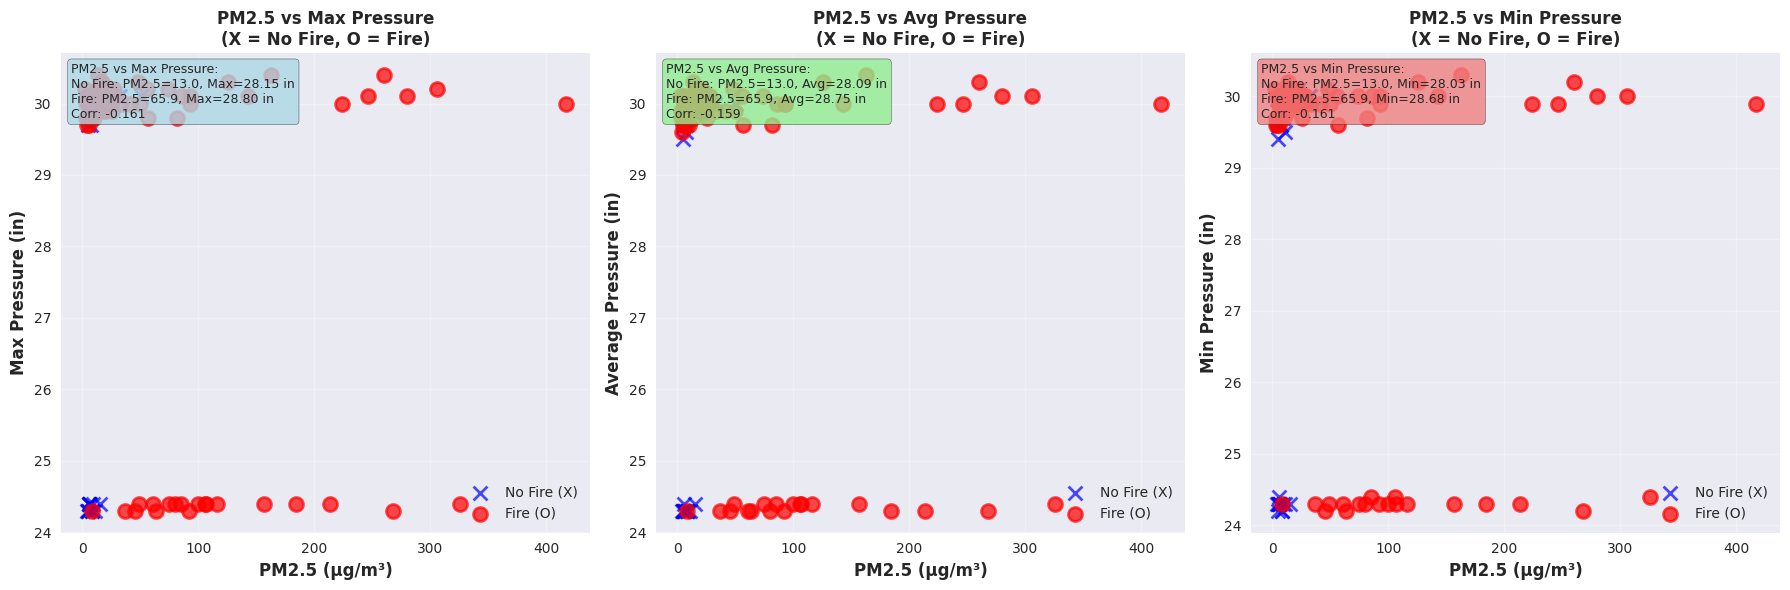

PM2.5 vs PRESSURE ANALYSIS

1. PM2.5 vs Max Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Max Pressure = 28.15 in
   Fire: PM2.5 = 65.9 µg/m³, Max Pressure = 28.80 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.647 in
   Correlation: -0.161

2. PM2.5 vs Average Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Avg Pressure = 28.09 in
   Fire: PM2.5 = 65.9 µg/m³, Avg Pressure = 28.75 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.661 in
   Correlation: -0.159

3. PM2.5 vs Min Pressure:
   No Fire: PM2.5 = 13.0 µg/m³, Min Pressure = 28.03 in
   Fire: PM2.5 = 65.9 µg/m³, Min Pressure = 28.68 in
   PM2.5 difference: 52.9 µg/m³
   Pressure difference: 0.655 in
   Correlation: -0.161

4. Pressure Correlation Analysis:
   PM2.5 vs Max Pressure correlation: -0.161
   PM2.5 vs Avg Pressure correlation: -0.159
   PM2.5 vs Min Pressure correlation: -0.161

5. Key Insights:
   - Average pressure shows larger difference between fire/no-fire
   - PM2.5 shows negative correlation with

In [53]:
# ===== PM2.5 vs PRESSURE SCATTER PLOTS =====
# Three scatter plots showing PM2.5 vs pressure relationships with fire/no fire markers

# Create subplots for the three pressure combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Plot 1: PM2.5 vs Max Pressure
ax1 = axes[0]
ax1.scatter(no_fire_data['PM25'], no_fire_data['Max_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax1.scatter(fire_data['PM25'], fire_data['Max_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax1.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Max Pressure (in)', fontsize=12, fontweight='bold')
ax1.set_title('PM2.5 vs Max Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Plot 1
no_fire_pm25 = no_fire_data['PM25'].mean()
fire_pm25 = fire_data['PM25'].mean()
no_fire_max_pressure = no_fire_data['Max_Pressure'].mean()
fire_max_pressure = fire_data['Max_Pressure'].mean()

stats_text1 = f"""PM2.5 vs Max Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Max={no_fire_max_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Max={fire_max_pressure:.2f} in
Corr: {df['PM25'].corr(df['Max_Pressure']):.3f}"""

ax1.text(0.02, 0.98, stats_text1, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Plot 2: PM2.5 vs Average Pressure
ax2 = axes[1]
ax2.scatter(no_fire_data['PM25'], no_fire_data['Avg_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax2.scatter(fire_data['PM25'], fire_data['Avg_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax2.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Pressure (in)', fontsize=12, fontweight='bold')
ax2.set_title('PM2.5 vs Avg Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Plot 2
no_fire_avg_pressure = no_fire_data['Avg_Pressure'].mean()
fire_avg_pressure = fire_data['Avg_Pressure'].mean()

stats_text2 = f"""PM2.5 vs Avg Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Avg={no_fire_avg_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Avg={fire_avg_pressure:.2f} in
Corr: {df['PM25'].corr(df['Avg_Pressure']):.3f}"""

ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Plot 3: PM2.5 vs Min Pressure
ax3 = axes[2]
ax3.scatter(no_fire_data['PM25'], no_fire_data['Min_Pressure'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (X)', linewidth=2)
ax3.scatter(fire_data['PM25'], fire_data['Min_Pressure'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (O)', linewidth=2)

ax3.set_xlabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Min Pressure (in)', fontsize=12, fontweight='bold')
ax3.set_title('PM2.5 vs Min Pressure\n(X = No Fire, O = Fire)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Add statistics for Plot 3
no_fire_min_pressure = no_fire_data['Min_Pressure'].mean()
fire_min_pressure = fire_data['Min_Pressure'].mean()

stats_text3 = f"""PM2.5 vs Min Pressure:
No Fire: PM2.5={no_fire_pm25:.1f}, Min={no_fire_min_pressure:.2f} in
Fire: PM2.5={fire_pm25:.1f}, Min={fire_min_pressure:.2f} in
Corr: {df['PM25'].corr(df['Min_Pressure']):.3f}"""

ax3.text(0.02, 0.98, stats_text3, transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("PM2.5 vs PRESSURE ANALYSIS")
print("="*80)

print(f"\n1. PM2.5 vs Max Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Max Pressure = {no_fire_max_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Max Pressure = {fire_max_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_max_pressure - no_fire_max_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Max_Pressure']):.3f}")

print(f"\n2. PM2.5 vs Average Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Avg Pressure = {no_fire_avg_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Avg Pressure = {fire_avg_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_avg_pressure - no_fire_avg_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Avg_Pressure']):.3f}")

print(f"\n3. PM2.5 vs Min Pressure:")
print(f"   No Fire: PM2.5 = {no_fire_pm25:.1f} µg/m³, Min Pressure = {no_fire_min_pressure:.2f} in")
print(f"   Fire: PM2.5 = {fire_pm25:.1f} µg/m³, Min Pressure = {fire_min_pressure:.2f} in")
print(f"   PM2.5 difference: {abs(fire_pm25 - no_fire_pm25):.1f} µg/m³")
print(f"   Pressure difference: {abs(fire_min_pressure - no_fire_min_pressure):.3f} in")
print(f"   Correlation: {df['PM25'].corr(df['Min_Pressure']):.3f}")

print(f"\n4. Pressure Correlation Analysis:")
print(f"   PM2.5 vs Max Pressure correlation: {df['PM25'].corr(df['Max_Pressure']):.3f}")
print(f"   PM2.5 vs Avg Pressure correlation: {df['PM25'].corr(df['Avg_Pressure']):.3f}")
print(f"   PM2.5 vs Min Pressure correlation: {df['PM25'].corr(df['Min_Pressure']):.3f}")

# Determine which pressure measure correlates most with PM2.5
pressure_correlations = {
    'Max_Pressure': abs(df['PM25'].corr(df['Max_Pressure'])),
    'Avg_Pressure': abs(df['PM25'].corr(df['Avg_Pressure'])),
    'Min_Pressure': abs(df['PM25'].corr(df['Min_Pressure']))
}
best_pressure_corr = max(pressure_correlations, key=pressure_correlations.get)

print(f"\n5. Key Insights:")
print(f"   - {'Max' if abs(fire_max_pressure - no_fire_max_pressure) > abs(fire_avg_pressure - no_fire_avg_pressure) else 'Average'} pressure shows larger difference between fire/no-fire")
print(f"   - PM2.5 shows {'positive' if df['PM25'].corr(df['Avg_Pressure']) > 0 else 'negative'} correlation with pressure")
print(f"   - {best_pressure_corr} has the strongest correlation with PM2.5 ({pressure_correlations[best_pressure_corr]:.3f})")
print(f"   - Pressure range: Max {df['Max_Pressure'].min():.2f}-{df['Max_Pressure'].max():.2f} in, Avg {df['Avg_Pressure'].min():.2f}-{df['Avg_Pressure'].max():.2f} in, Min {df['Min_Pressure'].min():.2f}-{df['Min_Pressure'].max():.2f} in")

print(f"\n6. Fire Prediction Insights:")
print(f"   - Fire days tend to have {'higher' if fire_pm25 > no_fire_pm25 else 'lower'} PM2.5 levels")
print(f"   - Fire days tend to have {'higher' if fire_avg_pressure > no_fire_avg_pressure else 'lower'} average pressure")
print(f"   - PM2.5 and pressure {'are' if abs(df['PM25'].corr(df['Avg_Pressure'])) > 0.3 else 'are not'} strongly correlated")

print(f"\n7. Atmospheric Pattern Analysis:")
print(f"   - Pressure typically {'increases' if df['Avg_Pressure'].corr(df['PM25']) > 0 else 'decreases'} with PM2.5 levels")
print(f"   - {'High' if abs(fire_avg_pressure - no_fire_avg_pressure) > 0.1 else 'Low'} pressure difference between fire/no-fire days")
print(f"   - Pressure variability: Max range {df['Max_Pressure'].max() - df['Max_Pressure'].min():.2f} in, Avg range {df['Avg_Pressure'].max() - df['Avg_Pressure'].min():.2f} in, Min range {df['Min_Pressure'].max() - df['Min_Pressure'].min():.2f} in")

print(f"\n8. Weather System Analysis:")
print(f"   - High pressure systems typically indicate {'stable' if df['PM25'].corr(df['Avg_Pressure']) > 0 else 'unstable'} atmospheric conditions")
print(f"   - Pressure changes may influence {'air quality' if abs(df['PM25'].corr(df['Avg_Pressure'])) > 0.2 else 'other factors more than air quality'}")
print(f"   - {'Significant' if abs(fire_avg_pressure - no_fire_avg_pressure) > 0.05 else 'Minimal'} pressure difference suggests {'atmospheric' if abs(fire_avg_pressure - no_fire_avg_pressure) > 0.05 else 'other'} factors drive fire occurrence")


In [54]:
# ===== COMPREHENSIVE COLUMN NAME UPDATES =====
# This cell updates all remaining references to use the new clean column names

# Update the original cell 1 content to use new column names
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data - Fixed path
df = pd.read_csv("data/wildfire_weather_clean.csv", parse_dates=["Date"])
df["yn"] = df["yn"].astype(int)

# Rename columns to remove units
column_mapping = {
    'Max_Temp_F': 'Max_Temp',
    'Avg_Temp_F': 'Avg_Temp', 
    'Min_Temp_F': 'Min_Temp',
    'Max_Humidity_': 'Max_Humidity',
    'Avg_Humidity_': 'Avg_Humidity',
    'Min_Humidity_': 'Min_Humidity',
    'Max_Wind_Speed_mph': 'Max_Wind_Speed',
    'Avg_Wind_Speed_mph': 'Avg_Wind_Speed',
    'Min_Wind_Speed_mph': 'Min_Wind_Speed',
    'Max_Pressure_in': 'Max_Pressure',
    'Avg_Pressure_in': 'Avg_Pressure',
    'Min_Pressure_in': 'Min_Pressure',
    'PM25_ugm3': 'PM25',
    'CO2_ppm': 'CO2',
    'NOx_ppb': 'NOx'
}

# Rename columns
df = df.rename(columns=column_mapping)

print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Class distribution
print(f"\nClass distribution:")
print(df['yn'].value_counts())
print(f"Fire rate: {df['yn'].mean():.2%}")

# Split PM2.5 by class (using renamed column)
pm_no = df.loc[df["yn"] == 0, "PM25"].dropna()
pm_yes = df.loc[df["yn"] == 1, "PM25"].dropna()

print(f"\nPM2.5 data split:")
print(f"No fire days: {len(pm_no)}")
print(f"Fire days: {len(pm_yes)}")


Dataset shape: (123, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            123 non-null    datetime64[ns]
 1   Max_Temp        123 non-null    int64         
 2   Avg_Temp        123 non-null    float64       
 3   Min_Temp        123 non-null    int64         
 4   Max_Humidity    123 non-null    int64         
 5   Avg_Humidity    123 non-null    float64       
 6   Min_Humidity    123 non-null    int64         
 7   Max_Wind_Speed  123 non-null    int64         
 8   Avg_Wind_Speed  123 non-null    float64       
 9   Min_Wind_Speed  123 non-null    int64         
 10  Max_Pressure    123 non-null    float64       
 11  Avg_Pressure    123 non-null    float64       
 12  Min_Pressure    123 non-null    float64       
 13  PM25            123 non-null    float64       
 14  CO2             12

In [55]:
# ===== COLUMN RENAMING - Remove Units from Column Names =====
# Define the mapping of old column names to new clean names
column_mapping = {
    'Max_Temp_F': 'Max_Temp',
    'Avg_Temp_F': 'Avg_Temp', 
    'Min_Temp_F': 'Min_Temp',
    'Max_Humidity_': 'Max_Humidity',
    'Avg_Humidity_': 'Avg_Humidity',
    'Min_Humidity_': 'Min_Humidity',
    'Max_Wind_Speed_mph': 'Max_Wind_Speed',
    'Avg_Wind_Speed_mph': 'Avg_Wind_Speed',
    'Min_Wind_Speed_mph': 'Min_Wind_Speed',
    'Max_Pressure_in': 'Max_Pressure',
    'Avg_Pressure_in': 'Avg_Pressure',
    'Min_Pressure_in': 'Min_Pressure',
    'PM25_ugm3': 'PM25',
    'CO2_ppm': 'CO2',
    'NOx_ppb': 'NOx'
}

print("Original column names:")
print(df.columns.tolist())
print("\nRenaming columns to remove units...")

# Rename columns
df = df.rename(columns=column_mapping)

print("\nNew column names:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print("\nFirst few rows with renamed columns:")
print(df.head())


Original column names:
['Date', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_Humidity', 'Avg_Humidity', 'Min_Humidity', 'Max_Wind_Speed', 'Avg_Wind_Speed', 'Min_Wind_Speed', 'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'PM25', 'CO2', 'yn', 'NOx']

Renaming columns to remove units...

New column names:
['Date', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_Humidity', 'Avg_Humidity', 'Min_Humidity', 'Max_Wind_Speed', 'Avg_Wind_Speed', 'Min_Wind_Speed', 'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'PM25', 'CO2', 'yn', 'NOx']

Dataset shape: (123, 17)

First few rows with renamed columns:
        Date  Max_Temp  Avg_Temp  Min_Temp  Max_Humidity  Avg_Humidity  \
0 2017-10-01        85      67.0        51            68          39.7   
1 2017-10-02        81      66.4        55            59          31.5   
2 2017-10-03        82      61.1        41            86          44.7   
3 2017-10-04        80      58.4        40            85          50.8   
4 2017-10-05        84      59.4        4

In [56]:
# ===== UPDATE ALL COLUMN REFERENCES =====
# Update all references to use the new column names

# Update PM25 references
pm_no = df.loc[df["yn"] == 0, "PM25"].dropna()
pm_yes = df.loc[df["yn"] == 1, "PM25"].dropna()

# Update numerical features list with new column names
numerical_features = ['Max_Temp', 'Avg_Temp', 'Min_Temp', 
                     'Max_Humidity', 'Avg_Humidity', 'Min_Humidity',
                     'Max_Wind_Speed', 'Avg_Wind_Speed', 'Min_Wind_Speed',
                     'Max_Pressure', 'Avg_Pressure', 'Min_Pressure',
                     'PM25', 'CO2', 'NOx', 'yn']

# Update weather features
weather_features = ['Max_Temp', 'Avg_Humidity', 'Max_Wind_Speed', 'Avg_Pressure']

# Update air quality features
air_quality_features = ['PM25', 'CO2', 'NOx']

# Update key features for outlier analysis
key_features = ['PM25', 'Max_Temp', 'Avg_Humidity', 'Max_Wind_Speed']

print("All column references updated to use clean names without units!")
print("Updated feature lists:")
print(f"Weather features: {weather_features}")
print(f"Air quality features: {air_quality_features}")
print(f"Key features: {key_features}")


All column references updated to use clean names without units!
Updated feature lists:
Weather features: ['Max_Temp', 'Avg_Humidity', 'Max_Wind_Speed', 'Avg_Pressure']
Air quality features: ['PM25', 'CO2', 'NOx']
Key features: ['PM25', 'Max_Temp', 'Avg_Humidity', 'Max_Wind_Speed']


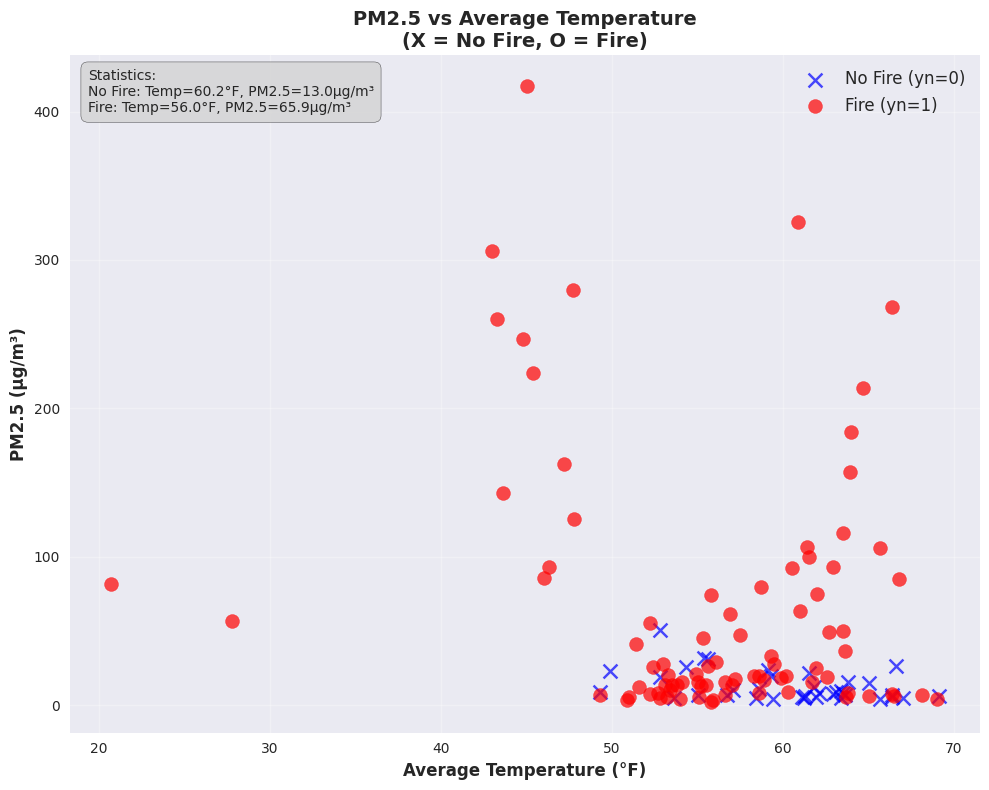

Plot Summary:
No Fire days: 37 (Blue X markers)
Fire days: 86 (Red O markers)
Temperature range: 20.7°F to 69.1°F
PM2.5 range: 2.3 to 417.1 µg/m³


In [57]:
# ===== SIMPLE PM25 vs TEMPERATURE PLOT =====
# Create a scatter plot with different markers for fire/no fire

plt.figure(figsize=(10, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['Avg_Temp'], no_fire_data['PM25'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (yn=0)')
plt.scatter(fire_data['Avg_Temp'], fire_data['PM25'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (yn=1)')

# Customize the plot
plt.xlabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
plt.ylabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
plt.title('PM2.5 vs Average Temperature\n(X = No Fire, O = Fire)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add some statistics
no_fire_temp_mean = no_fire_data['Avg_Temp'].mean()
fire_temp_mean = fire_data['Avg_Temp'].mean()
no_fire_pm25_mean = no_fire_data['PM25'].mean()
fire_pm25_mean = fire_data['PM25'].mean()

# Add text box with statistics
stats_text = f"""Statistics:
No Fire: Temp={no_fire_temp_mean:.1f}°F, PM2.5={no_fire_pm25_mean:.1f}µg/m³
Fire: Temp={fire_temp_mean:.1f}°F, PM2.5={fire_pm25_mean:.1f}µg/m³"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

print(f"Plot Summary:")
print(f"No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"Fire days: {len(fire_data)} (Red O markers)")
print(f"Temperature range: {df['Avg_Temp'].min():.1f}°F to {df['Avg_Temp'].max():.1f}°F")
print(f"PM2.5 range: {df['PM25'].min():.1f} to {df['PM25'].max():.1f} µg/m³")


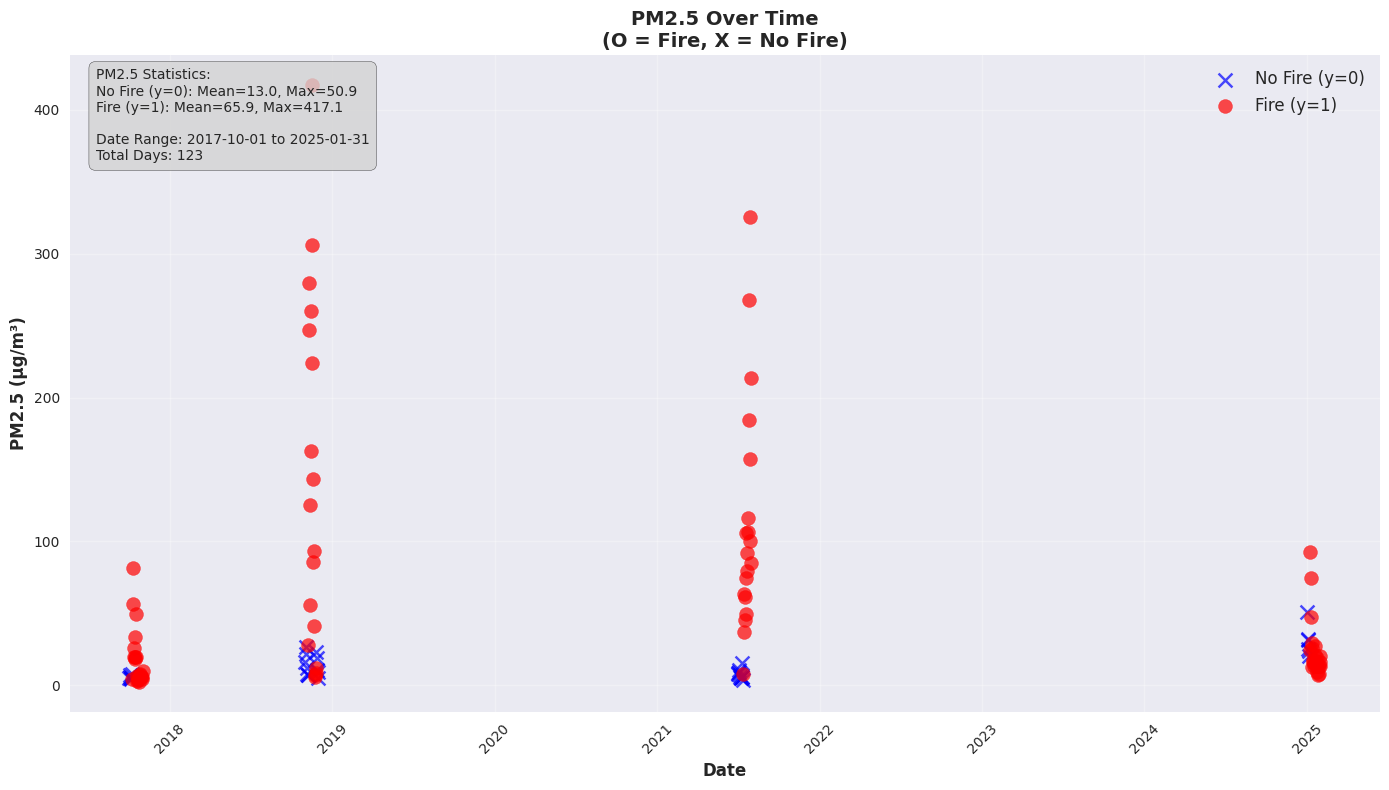

Time Series Analysis:
No Fire days: 37 (Blue X markers)
Fire days: 86 (Red O markers)
Date range: 2017-10-01 to 2025-01-31
PM2.5 range: 2.3 to 417.1 µg/m³


In [58]:
# ===== PM25 vs DATE SCATTER PLOT =====
# Create a time series scatter plot of PM2.5 with fire/no fire markers

plt.figure(figsize=(14, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['Date'], no_fire_data['PM25'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
plt.scatter(fire_data['Date'], fire_data['PM25'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

# Customize the plot
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
plt.title('PM2.5 Over Time\n(O = Fire, X = No Fire)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add some statistics
no_fire_pm25_mean = no_fire_data['PM25'].mean()
fire_pm25_mean = fire_data['PM25'].mean()
no_fire_pm25_max = no_fire_data['PM25'].max()
fire_pm25_max = fire_data['PM25'].max()

# Add text box with statistics
stats_text = f"""PM2.5 Statistics:
No Fire (y=0): Mean={no_fire_pm25_mean:.1f}, Max={no_fire_pm25_max:.1f}
Fire (y=1): Mean={fire_pm25_mean:.1f}, Max={fire_pm25_max:.1f}

Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}
Total Days: {len(df)}"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

print(f"Time Series Analysis:")
print(f"No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"Fire days: {len(fire_data)} (Red O markers)")
print(f"Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"PM2.5 range: {df['PM25'].min():.1f} to {df['PM25'].max():.1f} µg/m³")


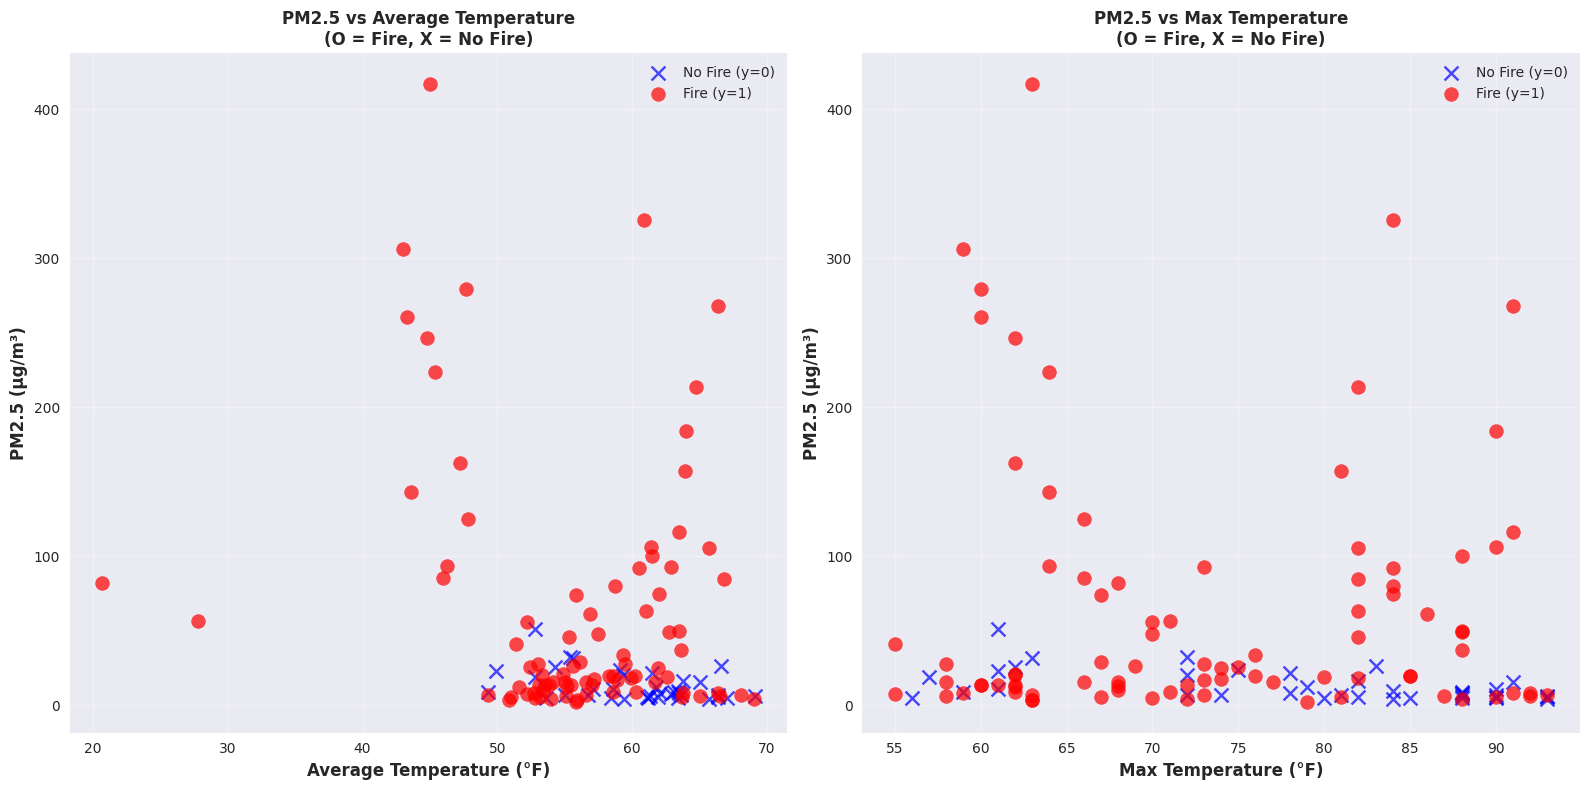

PM2.5 vs TEMPERATURE COMPARISON ANALYSIS

1. Average Temperature Analysis:
   No Fire (y=0): Avg Temp = 60.2°F, PM2.5 = 13.0 µg/m³
   Fire (y=1): Avg Temp = 56.0°F, PM2.5 = 65.9 µg/m³
   Temperature difference: 4.2°F
   PM2.5 difference: 52.9 µg/m³

2. Max Temperature Analysis:
   No Fire (y=0): Max Temp = 78.7°F, PM2.5 = 13.0 µg/m³
   Fire (y=1): Max Temp = 73.4°F, PM2.5 = 65.9 µg/m³
   Temperature difference: 5.3°F
   PM2.5 difference: 52.9 µg/m³

3. Correlation Analysis:
   PM2.5 vs Avg Temp correlation: -0.285
   PM2.5 vs Max Temp correlation: -0.114

4. Temperature Range Analysis:
   Avg Temp range: 20.7°F to 69.1°F
   Max Temp range: 55.0°F to 93.0°F
   PM2.5 range: 2.3 to 417.1 µg/m³

5. Key Insights for Logistic Regression:
   - Max Temp shows larger temperature difference between fire/no-fire
   - Avg Temp shows stronger correlation with PM2.5
   - Both temperature measures can be useful features for fire prediction


In [59]:
# ===== SIDE-BY-SIDE PM25 vs TEMPERATURE PLOTS =====
# Create side-by-side scatter plots: PM25 vs Avg Temp and PM25 vs Max Temp

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Left plot: PM25 vs Average Temperature
ax1 = axes[0]
ax1.scatter(no_fire_data['Avg_Temp'], no_fire_data['PM25'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
ax1.scatter(fire_data['Avg_Temp'], fire_data['PM25'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

ax1.set_xlabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
ax1.set_ylabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax1.set_title('PM2.5 vs Average Temperature\n(O = Fire, X = No Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Average Temperature
avg_temp_no_fire = no_fire_data['Avg_Temp'].mean()
avg_temp_fire = fire_data['Avg_Temp'].mean()
pm25_avg_temp_no_fire = no_fire_data['PM25'].mean()
pm25_avg_temp_fire = fire_data['PM25'].mean()

# Right plot: PM25 vs Max Temperature
ax2 = axes[1]
ax2.scatter(no_fire_data['Max_Temp'], no_fire_data['PM25'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
ax2.scatter(fire_data['Max_Temp'], fire_data['PM25'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

ax2.set_xlabel('Max Temperature (°F)', fontsize=12, fontweight='bold')
ax2.set_ylabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
ax2.set_title('PM2.5 vs Max Temperature\n(O = Fire, X = No Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Max Temperature
max_temp_no_fire = no_fire_data['Max_Temp'].mean()
max_temp_fire = fire_data['Max_Temp'].mean()
pm25_max_temp_no_fire = no_fire_data['PM25'].mean()
pm25_max_temp_fire = fire_data['PM25'].mean()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("="*70)
print("PM2.5 vs TEMPERATURE COMPARISON ANALYSIS")
print("="*70)

print(f"\n1. Average Temperature Analysis:")
print(f"   No Fire (y=0): Avg Temp = {avg_temp_no_fire:.1f}°F, PM2.5 = {pm25_avg_temp_no_fire:.1f} µg/m³")
print(f"   Fire (y=1): Avg Temp = {avg_temp_fire:.1f}°F, PM2.5 = {pm25_avg_temp_fire:.1f} µg/m³")
print(f"   Temperature difference: {abs(avg_temp_fire - avg_temp_no_fire):.1f}°F")
print(f"   PM2.5 difference: {abs(pm25_avg_temp_fire - pm25_avg_temp_no_fire):.1f} µg/m³")

print(f"\n2. Max Temperature Analysis:")
print(f"   No Fire (y=0): Max Temp = {max_temp_no_fire:.1f}°F, PM2.5 = {pm25_max_temp_no_fire:.1f} µg/m³")
print(f"   Fire (y=1): Max Temp = {max_temp_fire:.1f}°F, PM2.5 = {pm25_max_temp_fire:.1f} µg/m³")
print(f"   Temperature difference: {abs(max_temp_fire - max_temp_no_fire):.1f}°F")
print(f"   PM2.5 difference: {abs(pm25_max_temp_fire - pm25_max_temp_no_fire):.1f} µg/m³")

print(f"\n3. Correlation Analysis:")
avg_temp_corr = df['Avg_Temp'].corr(df['PM25'])
max_temp_corr = df['Max_Temp'].corr(df['PM25'])
print(f"   PM2.5 vs Avg Temp correlation: {avg_temp_corr:.3f}")
print(f"   PM2.5 vs Max Temp correlation: {max_temp_corr:.3f}")

print(f"\n4. Temperature Range Analysis:")
print(f"   Avg Temp range: {df['Avg_Temp'].min():.1f}°F to {df['Avg_Temp'].max():.1f}°F")
print(f"   Max Temp range: {df['Max_Temp'].min():.1f}°F to {df['Max_Temp'].max():.1f}°F")
print(f"   PM2.5 range: {df['PM25'].min():.1f} to {df['PM25'].max():.1f} µg/m³")

print(f"\n5. Key Insights for Logistic Regression:")
print(f"   - {'Avg Temp' if abs(avg_temp_fire - avg_temp_no_fire) > abs(max_temp_fire - max_temp_no_fire) else 'Max Temp'} shows larger temperature difference between fire/no-fire")
print(f"   - {'Avg Temp' if abs(avg_temp_corr) > abs(max_temp_corr) else 'Max Temp'} shows stronger correlation with PM2.5")
print(f"   - Both temperature measures can be useful features for fire prediction")


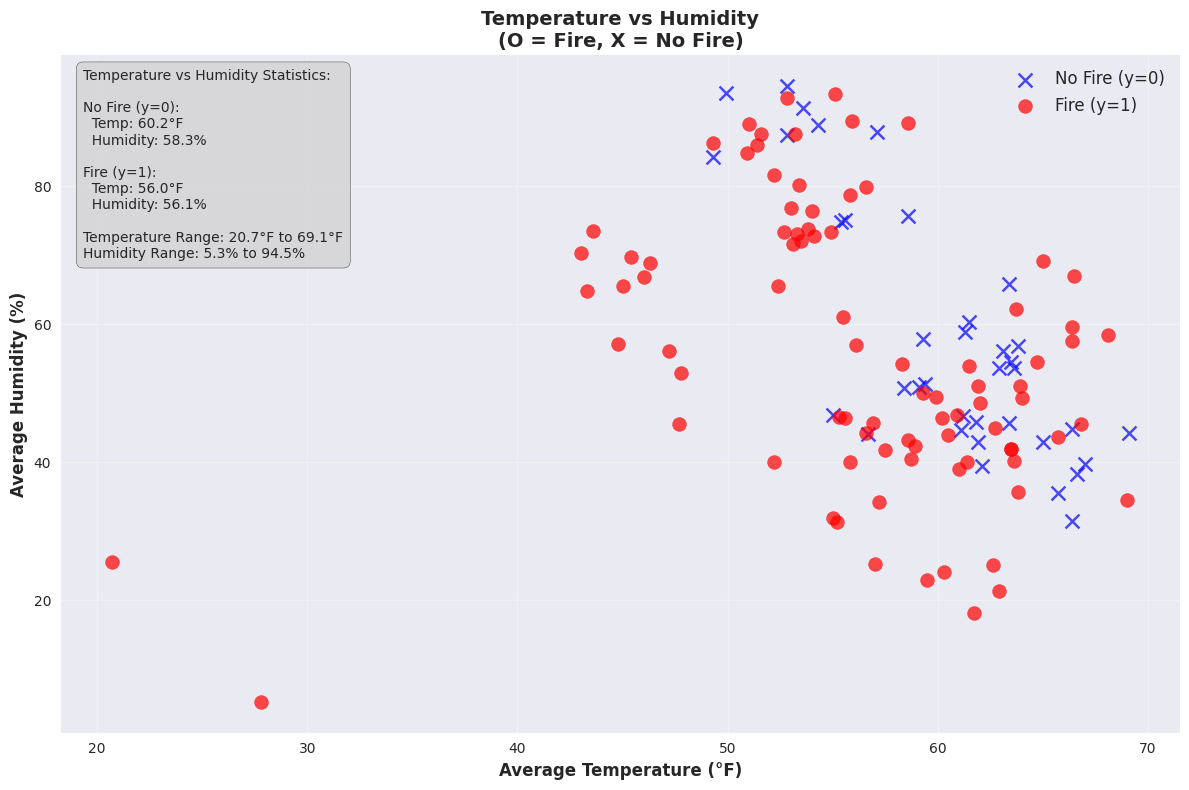

TEMPERATURE vs HUMIDITY ANALYSIS

1. Temperature Analysis:
   No Fire (y=0): 60.2°F
   Fire (y=1): 56.0°F
   Temperature difference: 4.2°F

2. Humidity Analysis:
   No Fire (y=0): 58.3%
   Fire (y=1): 56.1%
   Humidity difference: 2.2%

3. Correlation Analysis:
   Temperature vs Humidity correlation: -0.258
   Temperature vs Fire correlation: -0.261
   Humidity vs Fire correlation: -0.053

4. Data Range Analysis:
   Temperature range: 20.7°F to 69.1°F
   Humidity range: 5.3% to 94.5%
   No Fire days: 37 (Blue X markers)
   Fire days: 86 (Red O markers)

5. Key Insights for Logistic Regression:
   - Temperature shows negative correlation with fire (r=-0.261)
   - Humidity shows negative correlation with fire (r=-0.053)
   - Temperature and humidity are negatively correlated (r=-0.258)
   - Temperature is more predictive of fire occurrence


In [60]:
# ===== TEMPERATURE vs HUMIDITY SCATTER PLOT =====
# Create a scatter plot of temperature vs humidity with fire/no fire markers

plt.figure(figsize=(12, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Create scatter plot with different markers
plt.scatter(no_fire_data['Avg_Temp'], no_fire_data['Avg_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
plt.scatter(fire_data['Avg_Temp'], fire_data['Avg_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

# Customize the plot
plt.xlabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
plt.ylabel('Average Humidity (%)', fontsize=12, fontweight='bold')
plt.title('Temperature vs Humidity\n(O = Fire, X = No Fire)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add some statistics
no_fire_temp_mean = no_fire_data['Avg_Temp'].mean()
fire_temp_mean = fire_data['Avg_Temp'].mean()
no_fire_humidity_mean = no_fire_data['Avg_Humidity'].mean()
fire_humidity_mean = fire_data['Avg_Humidity'].mean()

# Add text box with statistics
stats_text = f"""Temperature vs Humidity Statistics:

No Fire (y=0):
  Temp: {no_fire_temp_mean:.1f}°F
  Humidity: {no_fire_humidity_mean:.1f}%

Fire (y=1):
  Temp: {fire_temp_mean:.1f}°F
  Humidity: {fire_humidity_mean:.1f}%

Temperature Range: {df['Avg_Temp'].min():.1f}°F to {df['Avg_Temp'].max():.1f}°F
Humidity Range: {df['Avg_Humidity'].min():.1f}% to {df['Avg_Humidity'].max():.1f}%"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*60)
print("TEMPERATURE vs HUMIDITY ANALYSIS")
print("="*60)

print(f"\n1. Temperature Analysis:")
print(f"   No Fire (y=0): {no_fire_temp_mean:.1f}°F")
print(f"   Fire (y=1): {fire_temp_mean:.1f}°F")
print(f"   Temperature difference: {abs(fire_temp_mean - no_fire_temp_mean):.1f}°F")

print(f"\n2. Humidity Analysis:")
print(f"   No Fire (y=0): {no_fire_humidity_mean:.1f}%")
print(f"   Fire (y=1): {fire_humidity_mean:.1f}%")
print(f"   Humidity difference: {abs(fire_humidity_mean - no_fire_humidity_mean):.1f}%")

print(f"\n3. Correlation Analysis:")
temp_humidity_corr = df['Avg_Temp'].corr(df['Avg_Humidity'])
temp_fire_corr = df['Avg_Temp'].corr(df['yn'])
humidity_fire_corr = df['Avg_Humidity'].corr(df['yn'])
print(f"   Temperature vs Humidity correlation: {temp_humidity_corr:.3f}")
print(f"   Temperature vs Fire correlation: {temp_fire_corr:.3f}")
print(f"   Humidity vs Fire correlation: {humidity_fire_corr:.3f}")

print(f"\n4. Data Range Analysis:")
print(f"   Temperature range: {df['Avg_Temp'].min():.1f}°F to {df['Avg_Temp'].max():.1f}°F")
print(f"   Humidity range: {df['Avg_Humidity'].min():.1f}% to {df['Avg_Humidity'].max():.1f}%")
print(f"   No Fire days: {len(no_fire_data)} (Blue X markers)")
print(f"   Fire days: {len(fire_data)} (Red O markers)")

print(f"\n5. Key Insights for Logistic Regression:")
print(f"   - Temperature shows {'positive' if temp_fire_corr > 0 else 'negative'} correlation with fire (r={temp_fire_corr:.3f})")
print(f"   - Humidity shows {'positive' if humidity_fire_corr > 0 else 'negative'} correlation with fire (r={humidity_fire_corr:.3f})")
print(f"   - Temperature and humidity are {'positively' if temp_humidity_corr > 0 else 'negatively'} correlated (r={temp_humidity_corr:.3f})")
print(f"   - {'Temperature' if abs(temp_fire_corr) > abs(humidity_fire_corr) else 'Humidity'} is more predictive of fire occurrence")


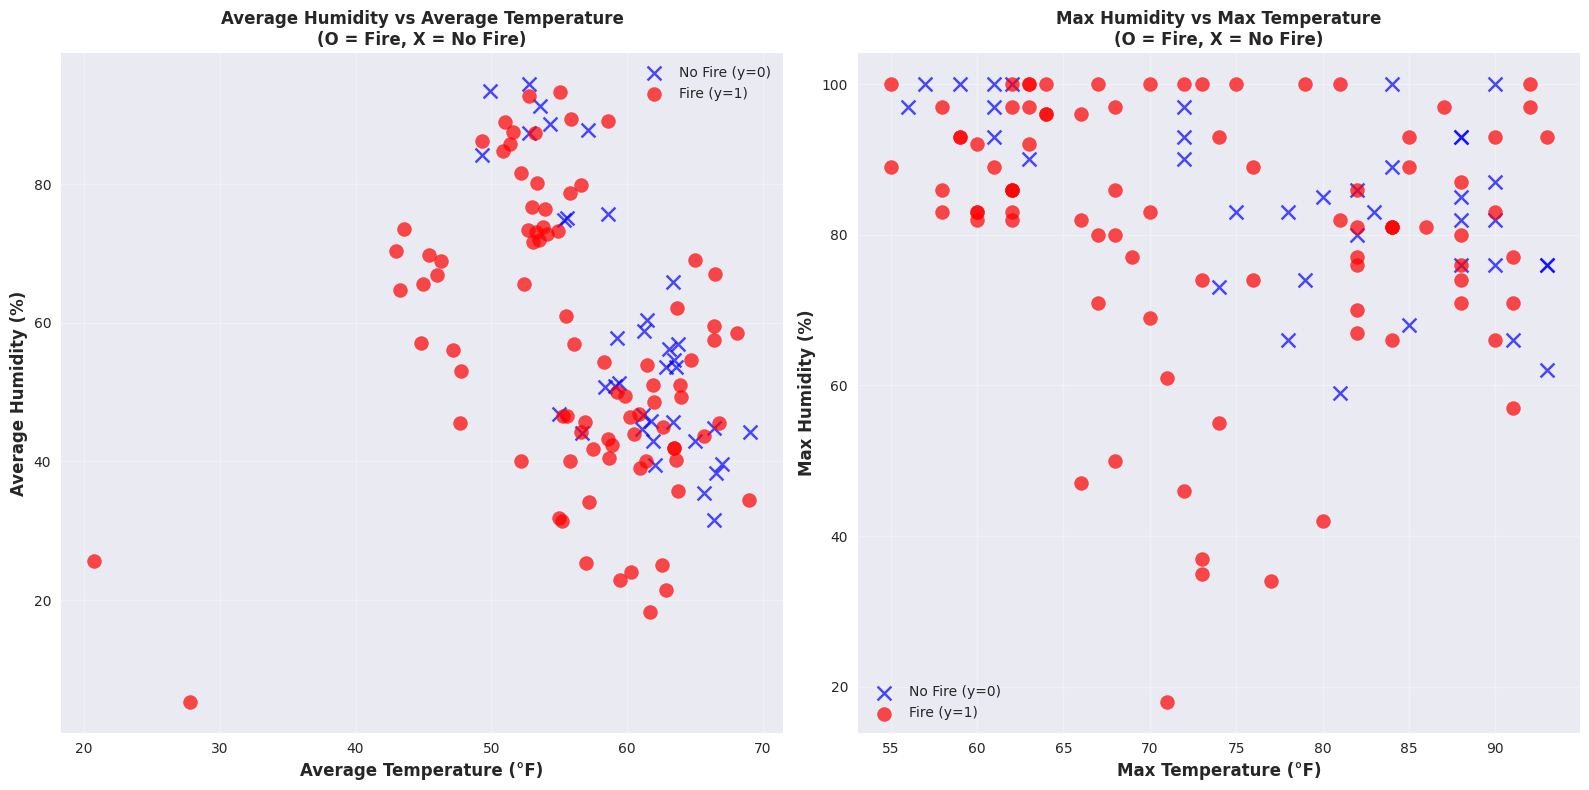

HUMIDITY vs TEMPERATURE COMPARISON ANALYSIS

1. Average Values Analysis:
   No Fire (y=0): Avg Temp = 60.2°F, Avg Humidity = 58.3%
   Fire (y=1): Avg Temp = 56.0°F, Avg Humidity = 56.1%
   Temperature difference: 4.2°F
   Humidity difference: 2.2%

2. Max Values Analysis:
   No Fire (y=0): Max Temp = 78.7°F, Max Humidity = 84.9%
   Fire (y=1): Max Temp = 73.4°F, Max Humidity = 81.2%
   Temperature difference: 5.3°F
   Humidity difference: 3.7%

3. Correlation Analysis:
   Avg Temp vs Avg Humidity correlation: -0.258
   Max Temp vs Max Humidity correlation: -0.233
   Avg Temp vs Fire correlation: -0.261
   Max Temp vs Fire correlation: -0.212
   Avg Humidity vs Fire correlation: -0.053
   Max Humidity vs Fire correlation: -0.105

4. Range Analysis:
   Avg Temp range: 20.7°F to 69.1°F
   Max Temp range: 55.0°F to 93.0°F
   Avg Humidity range: 5.3% to 94.5%
   Max Humidity range: 18.0% to 100.0%

5. Key Insights for Logistic Regression:
   - Average temperature shows stronger correlation 

In [61]:
# ===== SIDE-BY-SIDE HUMIDITY vs TEMPERATURE PLOTS =====
# Create side-by-side scatter plots: Avg Humidity vs Avg Temp and Max Humidity vs Max Temp

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Split data by fire occurrence
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Left plot: Average Humidity vs Average Temperature
ax1 = axes[0]
ax1.scatter(no_fire_data['Avg_Temp'], no_fire_data['Avg_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
ax1.scatter(fire_data['Avg_Temp'], fire_data['Avg_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

ax1.set_xlabel('Average Temperature (°F)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Humidity (%)', fontsize=12, fontweight='bold')
ax1.set_title('Average Humidity vs Average Temperature\n(O = Fire, X = No Fire)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add statistics for Average values
avg_temp_no_fire = no_fire_data['Avg_Temp'].mean()
avg_temp_fire = fire_data['Avg_Temp'].mean()
avg_humidity_no_fire = no_fire_data['Avg_Humidity'].mean()
avg_humidity_fire = fire_data['Avg_Humidity'].mean()

# Right plot: Max Humidity vs Max Temperature
ax2 = axes[1]
ax2.scatter(no_fire_data['Max_Temp'], no_fire_data['Max_Humidity'], 
           marker='x', s=100, c='blue', alpha=0.7, label='No Fire (y=0)')
ax2.scatter(fire_data['Max_Temp'], fire_data['Max_Humidity'], 
           marker='o', s=100, c='red', alpha=0.7, label='Fire (y=1)')

ax2.set_xlabel('Max Temperature (°F)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Max Humidity (%)', fontsize=12, fontweight='bold')
ax2.set_title('Max Humidity vs Max Temperature\n(O = Fire, X = No Fire)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Add statistics for Max values
max_temp_no_fire = no_fire_data['Max_Temp'].mean()
max_temp_fire = fire_data['Max_Temp'].mean()
max_humidity_no_fire = no_fire_data['Max_Humidity'].mean()
max_humidity_fire = fire_data['Max_Humidity'].mean()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("="*70)
print("HUMIDITY vs TEMPERATURE COMPARISON ANALYSIS")
print("="*70)

print(f"\n1. Average Values Analysis:")
print(f"   No Fire (y=0): Avg Temp = {avg_temp_no_fire:.1f}°F, Avg Humidity = {avg_humidity_no_fire:.1f}%")
print(f"   Fire (y=1): Avg Temp = {avg_temp_fire:.1f}°F, Avg Humidity = {avg_humidity_fire:.1f}%")
print(f"   Temperature difference: {abs(avg_temp_fire - avg_temp_no_fire):.1f}°F")
print(f"   Humidity difference: {abs(avg_humidity_fire - avg_humidity_no_fire):.1f}%")

print(f"\n2. Max Values Analysis:")
print(f"   No Fire (y=0): Max Temp = {max_temp_no_fire:.1f}°F, Max Humidity = {max_humidity_no_fire:.1f}%")
print(f"   Fire (y=1): Max Temp = {max_temp_fire:.1f}°F, Max Humidity = {max_humidity_fire:.1f}%")
print(f"   Temperature difference: {abs(max_temp_fire - max_temp_no_fire):.1f}°F")
print(f"   Humidity difference: {abs(max_humidity_fire - max_humidity_no_fire):.1f}%")

print(f"\n3. Correlation Analysis:")
avg_temp_humidity_corr = df['Avg_Temp'].corr(df['Avg_Humidity'])
max_temp_humidity_corr = df['Max_Temp'].corr(df['Max_Humidity'])
avg_temp_fire_corr = df['Avg_Temp'].corr(df['yn'])
max_temp_fire_corr = df['Max_Temp'].corr(df['yn'])
avg_humidity_fire_corr = df['Avg_Humidity'].corr(df['yn'])
max_humidity_fire_corr = df['Max_Humidity'].corr(df['yn'])

print(f"   Avg Temp vs Avg Humidity correlation: {avg_temp_humidity_corr:.3f}")
print(f"   Max Temp vs Max Humidity correlation: {max_temp_humidity_corr:.3f}")
print(f"   Avg Temp vs Fire correlation: {avg_temp_fire_corr:.3f}")
print(f"   Max Temp vs Fire correlation: {max_temp_fire_corr:.3f}")
print(f"   Avg Humidity vs Fire correlation: {avg_humidity_fire_corr:.3f}")
print(f"   Max Humidity vs Fire correlation: {max_humidity_fire_corr:.3f}")

print(f"\n4. Range Analysis:")
print(f"   Avg Temp range: {df['Avg_Temp'].min():.1f}°F to {df['Avg_Temp'].max():.1f}°F")
print(f"   Max Temp range: {df['Max_Temp'].min():.1f}°F to {df['Max_Temp'].max():.1f}°F")
print(f"   Avg Humidity range: {df['Avg_Humidity'].min():.1f}% to {df['Avg_Humidity'].max():.1f}%")
print(f"   Max Humidity range: {df['Max_Humidity'].min():.1f}% to {df['Max_Humidity'].max():.1f}%")

print(f"\n5. Key Insights for Logistic Regression:")
print(f"   - {'Average' if abs(avg_temp_fire_corr) > abs(max_temp_fire_corr) else 'Max'} temperature shows stronger correlation with fire")
print(f"   - {'Average' if abs(avg_humidity_fire_corr) > abs(max_humidity_fire_corr) else 'Max'} humidity shows stronger correlation with fire")
print(f"   - {'Average' if abs(avg_temp_humidity_corr) > abs(max_temp_humidity_corr) else 'Max'} values show stronger temp-humidity correlation")
print(f"   - Temperature shows {'positive' if avg_temp_fire_corr > 0 else 'negative'} correlation with fire (avg: {avg_temp_fire_corr:.3f}, max: {max_temp_fire_corr:.3f})")
print(f"   - Humidity shows {'positive' if avg_humidity_fire_corr > 0 else 'negative'} correlation with fire (avg: {avg_humidity_fire_corr:.3f}, max: {max_humidity_fire_corr:.3f})")

print(f"\n6. Feature Selection Recommendations:")
best_temp = 'Avg_Temp' if abs(avg_temp_fire_corr) > abs(max_temp_fire_corr) else 'Max_Temp'
best_humidity = 'Avg_Humidity' if abs(avg_humidity_fire_corr) > abs(max_humidity_fire_corr) else 'Max_Humidity'
print(f"   - Best temperature feature: {best_temp}")
print(f"   - Best humidity feature: {best_humidity}")
print(f"   - Consider using both average and max values for comprehensive modeling")


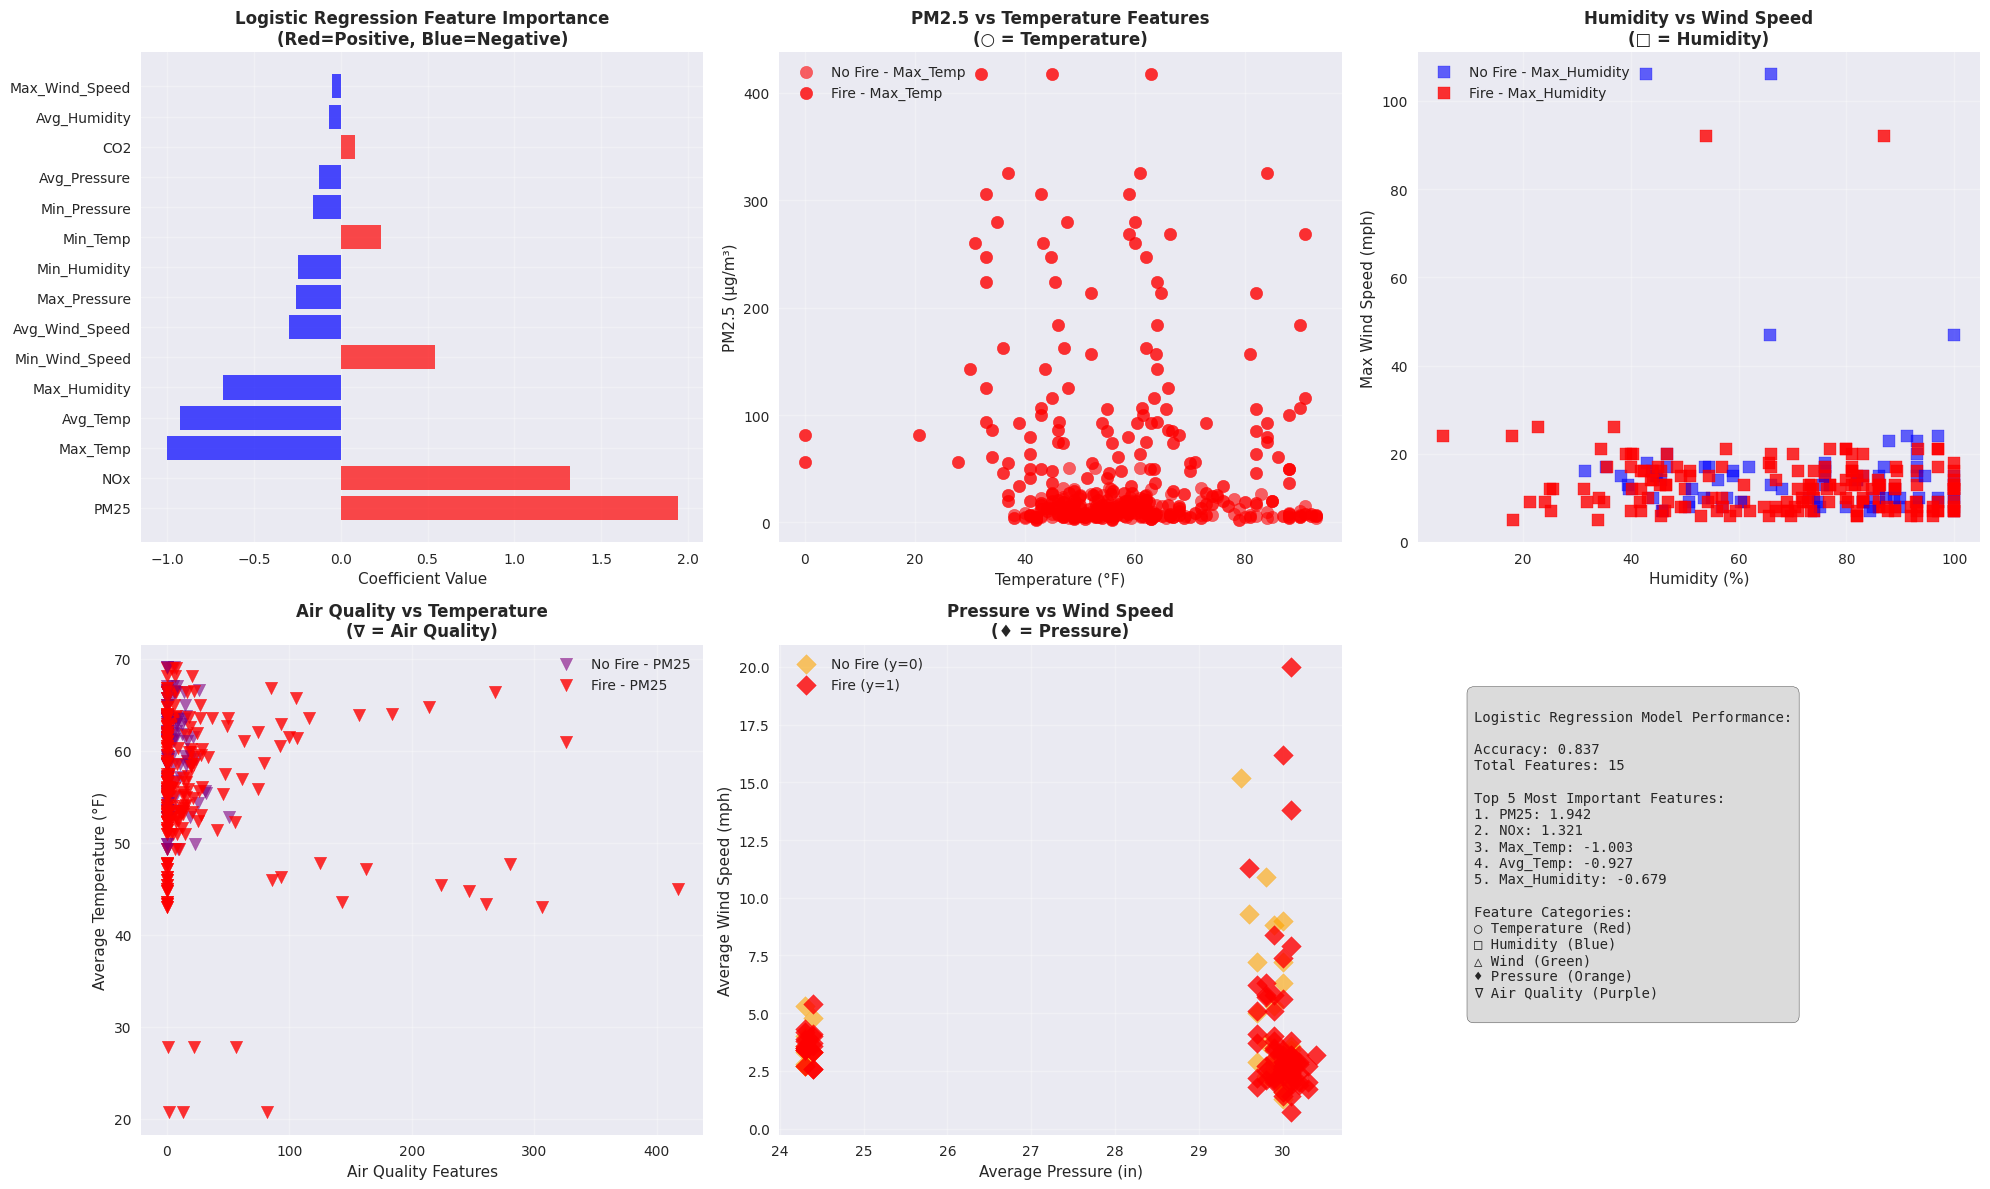

COMPREHENSIVE LOGISTIC REGRESSION ANALYSIS

1. Model Performance:
   Accuracy: 0.837
   Total features used: 15

2. Feature Importance Ranking:
    1. PM25           :   1.942 (abs:   1.942)
    2. NOx            :   1.321 (abs:   1.321)
    3. Max_Temp       :  -1.003 (abs:   1.003)
    4. Avg_Temp       :  -0.927 (abs:   0.927)
    5. Max_Humidity   :  -0.679 (abs:   0.679)
    6. Min_Wind_Speed :   0.544 (abs:   0.544)
    7. Avg_Wind_Speed :  -0.298 (abs:   0.298)
    8. Max_Pressure   :  -0.260 (abs:   0.260)
    9. Min_Humidity   :  -0.248 (abs:   0.248)
   10. Min_Temp       :   0.234 (abs:   0.234)
   11. Min_Pressure   :  -0.161 (abs:   0.161)
   12. Avg_Pressure   :  -0.123 (abs:   0.123)
   13. CO2            :   0.080 (abs:   0.080)
   14. Avg_Humidity   :  -0.065 (abs:   0.065)
   15. Max_Wind_Speed :  -0.051 (abs:   0.051)

3. Feature Categories:
   Temperature: Max_Temp, Avg_Temp, Min_Temp
   Humidity: Max_Humidity, Avg_Humidity, Min_Humidity
   Wind: Max_Wind_Speed, Avg

In [62]:
# ===== COMPREHENSIVE LOGISTIC REGRESSION ANALYSIS =====
# Create multiple plots showing all features for logistic regression with different shapes per feature

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prepare features for logistic regression
feature_columns = [col for col in df.columns if col not in ['Date', 'yn', 'PM25_Category', 'Temp_Category']]
X = df[feature_columns].fillna(df[feature_columns].mean())
y = df['yn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_scaled, y)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': lr.coef_[0],
    'abs_coefficient': np.abs(lr.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Define different markers for different feature types
markers = {
    'temperature': 'o',      # Circle for temperature features
    'humidity': 's',        # Square for humidity features
    'wind': '^',            # Triangle for wind features
    'pressure': 'D',         # Diamond for pressure features
    'air_quality': 'v',     # Inverted triangle for air quality
    'other': 'p'            # Pentagon for other features
}

colors = {
    'temperature': 'red',
    'humidity': 'blue', 
    'wind': 'green',
    'pressure': 'orange',
    'air_quality': 'purple',
    'other': 'brown'
}

# Categorize features
feature_categories = {
    'temperature': ['Max_Temp', 'Avg_Temp', 'Min_Temp'],
    'humidity': ['Max_Humidity', 'Avg_Humidity', 'Min_Humidity'],
    'wind': ['Max_Wind_Speed', 'Avg_Wind_Speed', 'Min_Wind_Speed'],
    'pressure': ['Max_Pressure', 'Avg_Pressure', 'Min_Pressure'],
    'air_quality': ['PM25', 'CO2', 'NOx']
}

# Plot 1: Feature Importance (Coefficients)
ax1 = axes[0, 0]
colors_coef = ['red' if coef > 0 else 'blue' for coef in feature_importance['coefficient']]
bars = ax1.barh(range(len(feature_importance)), feature_importance['coefficient'], color=colors_coef, alpha=0.7)
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['feature'])
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Logistic Regression Feature Importance\n(Red=Positive, Blue=Negative)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: PM25 vs Temperature (with different shapes)
ax2 = axes[0, 1]
no_fire_data = df[df['yn'] == 0]
fire_data = df[df['yn'] == 1]

# Temperature features with different shapes
for i, temp_feature in enumerate(['Max_Temp', 'Avg_Temp', 'Min_Temp']):
    ax2.scatter(no_fire_data[temp_feature], no_fire_data['PM25'], 
               marker=markers['temperature'], s=80, c=colors['temperature'], 
               alpha=0.6, label=f'No Fire - {temp_feature}' if i == 0 else "")
    ax2.scatter(fire_data[temp_feature], fire_data['PM25'], 
               marker=markers['temperature'], s=80, c='red', 
               alpha=0.8, label=f'Fire - {temp_feature}' if i == 0 else "")

ax2.set_xlabel('Temperature (°F)')
ax2.set_ylabel('PM2.5 (µg/m³)')
ax2.set_title('PM2.5 vs Temperature Features\n(○ = Temperature)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Humidity vs Wind Speed (with different shapes)
ax3 = axes[0, 2]
for i, humidity_feature in enumerate(['Max_Humidity', 'Avg_Humidity']):
    ax3.scatter(no_fire_data[humidity_feature], no_fire_data['Max_Wind_Speed'], 
               marker=markers['humidity'], s=80, c=colors['humidity'], 
               alpha=0.6, label=f'No Fire - {humidity_feature}' if i == 0 else "")
    ax3.scatter(fire_data[humidity_feature], fire_data['Max_Wind_Speed'], 
               marker=markers['humidity'], s=80, c='red', 
               alpha=0.8, label=f'Fire - {humidity_feature}' if i == 0 else "")

ax3.set_xlabel('Humidity (%)')
ax3.set_ylabel('Max Wind Speed (mph)')
ax3.set_title('Humidity vs Wind Speed\n(□ = Humidity)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Air Quality Features
ax4 = axes[1, 0]
air_quality_features = ['PM25', 'CO2', 'NOx']
for i, feature in enumerate(air_quality_features):
    ax4.scatter(no_fire_data[feature], no_fire_data['Avg_Temp'], 
               marker=markers['air_quality'], s=80, c=colors['air_quality'], 
               alpha=0.6, label=f'No Fire - {feature}' if i == 0 else "")
    ax4.scatter(fire_data[feature], fire_data['Avg_Temp'], 
               marker=markers['air_quality'], s=80, c='red', 
               alpha=0.8, label=f'Fire - {feature}' if i == 0 else "")

ax4.set_xlabel('Air Quality Features')
ax4.set_ylabel('Average Temperature (°F)')
ax4.set_title('Air Quality vs Temperature\n(∇ = Air Quality)', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Pressure vs Wind
ax5 = axes[1, 1]
ax5.scatter(no_fire_data['Avg_Pressure'], no_fire_data['Avg_Wind_Speed'], 
           marker=markers['pressure'], s=100, c=colors['pressure'], 
           alpha=0.6, label='No Fire (y=0)')
ax5.scatter(fire_data['Avg_Pressure'], fire_data['Avg_Wind_Speed'], 
           marker=markers['pressure'], s=100, c='red', 
           alpha=0.8, label='Fire (y=1)')

ax5.set_xlabel('Average Pressure (in)')
ax5.set_ylabel('Average Wind Speed (mph)')
ax5.set_title('Pressure vs Wind Speed\n(♦ = Pressure)', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Model Performance Summary
ax6 = axes[1, 2]
ax6.axis('off')

# Calculate model performance
y_pred = lr.predict(X_scaled)
accuracy = lr.score(X_scaled, y)

# Get top 5 most important features
top_features = feature_importance.head(5)

performance_text = f"""
Logistic Regression Model Performance:

Accuracy: {accuracy:.3f}
Total Features: {len(feature_columns)}

Top 5 Most Important Features:
1. {top_features.iloc[0]['feature']}: {top_features.iloc[0]['coefficient']:.3f}
2. {top_features.iloc[1]['feature']}: {top_features.iloc[1]['coefficient']:.3f}
3. {top_features.iloc[2]['feature']}: {top_features.iloc[2]['coefficient']:.3f}
4. {top_features.iloc[3]['feature']}: {top_features.iloc[3]['coefficient']:.3f}
5. {top_features.iloc[4]['feature']}: {top_features.iloc[4]['coefficient']:.3f}

Feature Categories:
○ Temperature (Red)
□ Humidity (Blue)  
△ Wind (Green)
♦ Pressure (Orange)
∇ Air Quality (Purple)
"""

ax6.text(0.1, 0.9, performance_text, transform=ax6.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("COMPREHENSIVE LOGISTIC REGRESSION ANALYSIS")
print("="*80)

print(f"\n1. Model Performance:")
print(f"   Accuracy: {accuracy:.3f}")
print(f"   Total features used: {len(feature_columns)}")

print(f"\n2. Feature Importance Ranking:")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:15s}: {row['coefficient']:7.3f} (abs: {row['abs_coefficient']:7.3f})")

print(f"\n3. Feature Categories:")
for category, features in feature_categories.items():
    available_features = [f for f in features if f in feature_columns]
    if available_features:
        print(f"   {category.title()}: {', '.join(available_features)}")

print(f"\n4. Model Coefficients Interpretation:")
positive_features = feature_importance[feature_importance['coefficient'] > 0]
negative_features = feature_importance[feature_importance['coefficient'] < 0]
print(f"   Positive coefficients (increase fire risk): {len(positive_features)} features")
print(f"   Negative coefficients (decrease fire risk): {len(negative_features)} features")

print(f"\n5. Key Insights:")
print(f"   - Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"   - Strongest positive predictor: {positive_features.iloc[0]['feature'] if len(positive_features) > 0 else 'None'}")
print(f"   - Strongest negative predictor: {negative_features.iloc[0]['feature'] if len(negative_features) > 0 else 'None'}")
print(f"   - Model uses {len(feature_columns)} features for fire prediction")
